In [3]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import rioxarray
import numpy as np
import geopandas as gpd
import cartopy.crs as ccrs
import rasterio
import os
import matplotlib.colors
scriptsdir = os.getcwd()
from scipy.interpolate import griddata
from functools import reduce
import xarray
import itertools
import argparse
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, BoundaryNorm
import cartopy.feature as cfeature


In [3]:
#!!!!!!!!!!!!!!!
import xarray as xr
import netCDF4
import os

sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
taxas = ["Mammals"]

years = ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050',
         '2052', '2056', '2080', '2100', '2150', '2200', '2250']

for taxa in taxas:
    for sdm in sdms:
        dir_species = "/storage/scratch/users/ch21o450/data/LandClim_Output/" + sdm + "/" + taxa + "/EWEMBI/"
        available_file = os.listdir(dir_species)
        available_names = [x.split("_[1146].nc")[0] for x in available_file]

species_names = available_names[:5]

# Define the netCDF file path
netcdf_path_format_future = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/{}/{}/{}_[{}].nc"
netcdf_path_format_hist = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/EWEMBI/{}_[{}].nc"

# Define the time and scenario
time = 35
historical_time= 1146
scenario = "rcp26"

# Create the dictionary
newvalue_dict = {}

# Loop over all species
for species_name in species_names:

    # Loop over all models
    for sdm in sdms:
        if sdm not in newvalue_dict:
            newvalue_dict[sdm] = {}

        for gcm in gcms:
            # Open the netCDF file
            ds = xr.open_dataset(netcdf_path_format_future.format(sdm, taxa, gcm, scenario, species_name, time), decode_times=False)

            # Get the newvalue
            newvalue = ds["newvalue"]

            # Add the newvalue to the dictionary
            if gcm not in newvalue_dict[sdm]:
                newvalue_dict[sdm][gcm] = []

            newvalue_dict[sdm][gcm].append(newvalue)

# Calculate the mean newvalue per sdm, per gcm
mean_newvalue = {}

for sdm in newvalue_dict:
    mean_newvalue[sdm] = {}

    for gcm in newvalue_dict[sdm]:
        mean_newvalue[sdm][gcm] = xr.concat(newvalue_dict[sdm][gcm], dim="species").mean(dim="species")

# Print the mean_newvalue dictionary
print(mean_newvalue)


{'GAM': {'GFDL-ESM2M': <xarray.DataArray 'newvalue' (lat: 360, lon: 720)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75, 'IPSL-CM5A-LR': <xarray.DataArray 'newvalue' (lat: 360, lon: 720)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75, 'HadGEM2-ES': <xarray.DataArray 'newvalue' 

In [5]:
import xarray as xr
import netCDF4
import os

sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
taxas = ["Mammals"]

years = ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050',
         '2052', '2056', '2080', '2100', '2150', '2200', '2250']

for taxa in taxas:
    for sdm in sdms:
        dir_species = "/storage/scratch/users/ch21o450/data/LandClim_Output/" + sdm + "/" + taxa + "/EWEMBI/"
        available_file = os.listdir(dir_species)
        available_names = [x.split("_[1146].nc")[0] for x in available_file]

species_names = available_names[:5]

# Define the netCDF file path
netcdf_path_format = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/{}/{}/{}_[{}].nc"

# Define the time and scenario
time = 35
scenario = "rcp26"

# Create the dictionaries
newvalue_dict = {}
sumbin_dict = {}

# Loop over all species
for species_name in species_names:

    # Loop over all models
    for sdm in sdms:
        if sdm not in newvalue_dict:
            newvalue_dict[sdm] = {}
        if sdm not in sumbin_dict:
            sumbin_dict[sdm] = {}

        for gcm in gcms:
            # Open the netCDF file
            ds = xr.open_dataset(netcdf_path_format.format(sdm, taxa, gcm, scenario, species_name, time), decode_times=False)

            # Get the newvalue and sum_bin
            newvalue = ds["newvalue"]
            sum_bin = ds["sum_bin"]

            # Add the newvalue and sum_bin to the dictionaries
            if gcm not in newvalue_dict[sdm]:
                newvalue_dict[sdm][gcm] = []
            if gcm not in sumbin_dict[sdm]:
                sumbin_dict[sdm][gcm] = []

            newvalue_dict[sdm][gcm].append(newvalue)
            sumbin_dict[sdm][gcm].append(sum_bin)

# Calculate the mean newvalue per sdm, per gcm
mean_newvalue = {}

for sdm in newvalue_dict:
    mean_newvalue[sdm] = {}

    for gcm in newvalue_dict[sdm]:
        mean_newvalue[sdm][gcm] = xr.concat(newvalue_dict[sdm][gcm], dim="species").mean(dim="species")

# Calculate the mean sum_bin per sdm, per gcm
mean_sumbin = {}

for sdm in sumbin_dict:
    mean_sumbin[sdm] = {}

    for gcm in sumbin_dict[sdm]:
        mean_sumbin[sdm][gcm] = xr.concat(sumbin_dict[sdm][gcm], dim="species").mean(dim="species")

# Print the mean_sumbin dictionary
print(mean_sumbin)


{'GAM': {'GFDL-ESM2M': <xarray.DataArray 'sum_bin' (time: 1, lat: 360, lon: 720)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) float64 35.0
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75, 'IPSL-CM5A-LR': <xarray.DataArray 'sum_bin' (time: 1, lat: 360, lon: 720)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) float64 35.0
  * lon      (lon) float64 

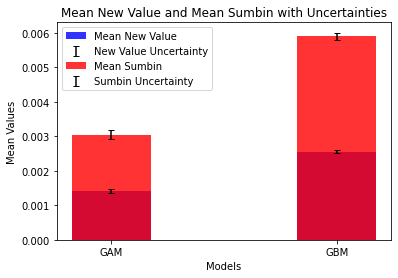

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean values and uncertainties for mean_newvalue
mean_values_newvalue = []
uncertainties_newvalue = []

# Calculate mean and standard deviation for mean_newvalue
for sdm in sdms:
    sdm_values = []
    for gcm in gcms:
        sdm_values.append(mean_newvalue[sdm][gcm].mean().values)
    mean_values_newvalue.append(np.mean(sdm_values))
    uncertainties_newvalue.append(np.std(sdm_values))

# Calculate the mean values and uncertainties for mean_sumbin
mean_values_sumbin = []
uncertainties_sumbin = []

# Calculate mean and standard deviation for mean_sumbin
for sdm in sdms:
    sdm_values = []
    for gcm in gcms:
        sdm_values.append(mean_sumbin[sdm][gcm].mean().values)
    mean_values_sumbin.append(np.mean(sdm_values))
    uncertainties_sumbin.append(np.std(sdm_values))

# Set up the bar plot
sdm_indices = np.arange(len(sdms))

fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8

# Plot mean_newvalue
ax.bar(sdm_indices, mean_values_newvalue, bar_width, alpha=opacity, color='b', label='Mean New Value')
ax.errorbar(sdm_indices, mean_values_newvalue, yerr=uncertainties_newvalue, fmt='none', color='k', capsize=3, label='New Value Uncertainty')

# Plot mean_sumbin
ax.bar(sdm_indices, mean_values_sumbin, bar_width, alpha=opacity, color='r', label='Mean Sumbin')
ax.errorbar(sdm_indices, mean_values_sumbin, yerr=uncertainties_sumbin, fmt='none', color='k', capsize=3, label='Sumbin Uncertainty')

# Set labels, ticks, and title
ax.set_xlabel('Models')
ax.set_ylabel('Mean Values')
ax.set_title('Mean New Value and Mean Sumbin with Uncertainties')
ax.set_xticks(sdm_indices)
ax.set_xticklabels(sdms)
ax.legend()

# Display the plot
plt.show()


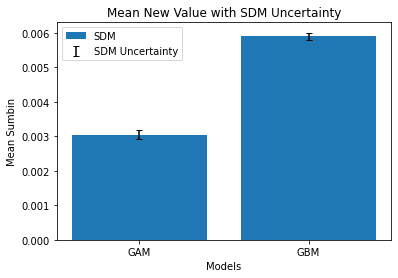

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean values and uncertainties
mean_values_sdm = []
uncertainties_sdm = []

# Calculate mean and standard deviation for SDMs
for sdm in sdms:
    sdm_values = []
    for gcm in gcms:
        sdm_values.append(mean_sumbin[sdm][gcm].mean().values)
    mean_values_sdm.append(np.mean(sdm_values))
    uncertainties_sdm.append(np.std(sdm_values))

# Set up the bar plot
sdm_indices = np.arange(len(sdms))

fig, ax = plt.subplots()
bar_width = 0.8

# Plot SDM mean values
ax.bar(sdm_indices, mean_values_sdm, bar_width, label='SDM')

# Plot SDM uncertainties as whiskers
ax.errorbar(sdm_indices, mean_values_sdm, yerr=uncertainties_sdm, fmt='none', color='k', capsize=3, label='SDM Uncertainty')

# Set labels, ticks, and title
ax.set_xlabel('Models')
ax.set_ylabel('Mean Sumbin')
ax.set_title('Mean New Value with SDM Uncertainty')
ax.set_xticks(sdm_indices)
ax.set_xticklabels(sdms)
ax.legend()

# Display the plot
plt.show()


In [9]:
import xarray as xr
import netCDF4
import os

sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
taxas = ["Mammals"]

years = ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050',
         '2052', '2056', '2080', '2100', '2150', '2200', '2250']

for taxa in taxas:
    for sdm in sdms:
        dir_species = "/storage/scratch/users/ch21o450/data/LandClim_Output/" + sdm + "/" + taxa + "/EWEMBI/"
        available_file = os.listdir(dir_species)
        available_names = [x.split("_[1146].nc")[0] for x in available_file]

species_names = available_names[:5]

# Define the netCDF file path
netcdf_path_format = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/{}/{}/{}_[{}].nc"

# Define the time and scenario
time = 35
scenario = "rcp26"

# Create the dictionary
newvalue_dict = {}

# Loop over all species
for species_name in species_names:

    # Create a new dictionary for the species
    newvalue_dict[species_name] = {}

    # Loop over all models
    for sdm in sdms:
        newvalue_dict[species_name][sdm] = {}

        for gcm in gcms:
            # Open the netCDF file
            ds = xr.open_dataset(netcdf_path_format.format(sdm, taxa, gcm, scenario, species_name, time), decode_times=False)

            # Get the newvalue
            newvalue = ds["newvalue"]

            # Add the newvalue to the dictionary
            newvalue_dict[species_name][sdm][gcm] = newvalue

# Print the dictionary
print(newvalue_dict)


{'Harpiola_isodon': {'GAM': {'GFDL-ESM2M': <xarray.DataArray 'newvalue' (lat: 360, lon: 720)>
[259200 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75, 'IPSL-CM5A-LR': <xarray.DataArray 'newvalue' (lat: 360, lon: 720)>
[259200 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75, 'HadGEM2-ES': <xarray.DataArray 'newvalue' (lat: 360, lon: 720)>
[259200 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75, 'MIROC5': <xarray.DataArray 'newvalue' (lat: 360, lon: 720)>
[259200 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 

In [428]:
import xarray as xr
import os
import matplotlib.pyplot as plt
import numpy as np

sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
taxas = ["Mammals", "Amphibians"]  # Add the second taxa here
scenario = "rcp26"

years = ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050',
         '2052', '2056', '2080', '2100', '2150', '2200', '2250']

# Create the dictionaries
newvalue_dict_fut = {}
newvalue_dict_hist = {}
sumbin_dict = {}

# Initialize the dictionaries with SDM, GCM, and taxa keys
mean_newvalue_change = {}

   


for sdm in sdms:
    newvalue_dict_fut[sdm] = {}
    newvalue_dict_hist[sdm] = {}
    sumbin_dict[sdm] = {}
    mean_newvalue_change[sdm] = {}

    for gcm in gcms:
        newvalue_dict_fut[sdm][gcm] = {}
        newvalue_dict_hist[sdm][gcm] = {}
        sumbin_dict[sdm][gcm] = {}
        mean_newvalue_change[sdm][gcm] = {}

        for taxa in taxas:
            newvalue_dict_fut[sdm][gcm][taxa] = []
            newvalue_dict_hist[sdm][gcm][taxa] = []

# Loop over all taxa
for taxa in taxas:
    for sdm in sdms:
        dir_species = "/storage/scratch/users/ch21o450/data/LandClim_Output/" + sdm + "/" + taxa + "/EWEMBI/"
        available_file = os.listdir(dir_species)
        available_names = [x.split("_[1146].nc")[0] for x in available_file]

    species_names = available_names[:100]

    # Define the netCDF file path
    netcdf_path_format_future = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/{}/{}/{}_[{}].nc"
    netcdf_path_format_hist = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/EWEMBI/{}_[{}].nc"

    # Loop over all species
    for species_name in species_names:
        # Loop over all models
        for sdm in sdms:
            for gcm in gcms:
                # Open the netCDF files
                ds_newvalue_fut = xr.open_dataset(
                    netcdf_path_format_future.format(sdm, taxa, gcm, scenario, species_name, time),
                    decode_times=False
                )
                ds_newvalue_hist = xr.open_dataset(
                    netcdf_path_format_hist.format(sdm, taxa, species_name, historical_time),
                    decode_times=False
                )

                # Get the newvalue and sum_bin
                newvalue_fut = ds_newvalue_fut["newvalue"]
                newvalue_hist = ds_newvalue_hist["newvalue"]
                #sum_bin = ds_sumbin["sum_bin"]

                # Append the newvalue to the dictionaries
                newvalue_dict_fut[sdm][gcm][taxa].append(newvalue_fut)
                newvalue_dict_hist[sdm][gcm][taxa].append(newvalue_hist)
                # sumbin_dict[sdm][gcm].append(sum_bin)

    # Calculate the mean change from historical to future per sdm, per gcm, per taxa
    for sdm in newvalue_dict_fut:
        for gcm in newvalue_dict_fut[sdm]:
            for taxa in newvalue_dict_fut[sdm][gcm]:
                if len(newvalue_dict_hist[sdm][gcm][taxa]) > 0 and len(newvalue_dict_fut[sdm][gcm][taxa]) > 0:
                    newvalue_hist = xr.concat(newvalue_dict_hist[sdm][gcm][taxa], dim="species").mean(dim="species")
                    newvalue_future = xr.concat(newvalue_dict_fut[sdm][gcm][taxa], dim="species").mean(dim="species")
                    climate_change = (newvalue_future - newvalue_hist) * 100  # Calculate change as percentage

                    
                    mean_newvalue_change[sdm][gcm][taxa] = climate_change


                    

    

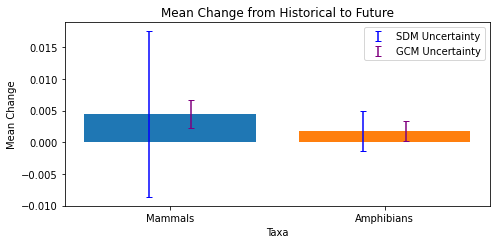

In [429]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean change and uncertainties for Mammals
mean_values_sdm_mammals = []
uncertainties_sdm_mammals = []
uncertainties_gcm_mammals = []

for sdm in sdms:
    sdm_values = []
    for gcm in gcms:
        sdm_values.append(mean_newvalue_change[sdm][gcm]["Mammals"].mean().item())
    mean_values_sdm_mammals.append(np.mean(sdm_values))
    uncertainties_sdm_mammals.append(np.std(sdm_values))

for gcm in gcms:
    gcm_values = []
    for sdm in sdms:
        gcm_values.append(mean_newvalue_change[sdm][gcm]["Mammals"].mean().item())
    uncertainties_gcm_mammals.append(np.std(gcm_values))

# Calculate the mean change and uncertainties for Amphibians
mean_values_sdm_amphibians = []
uncertainties_sdm_amphibians = []
uncertainties_gcm_amphibians = []

for sdm in sdms:
    sdm_values = []
    for gcm in gcms:
        sdm_values.append(mean_newvalue_change[sdm][gcm]["Amphibians"].mean().item())
    mean_values_sdm_amphibians.append(np.mean(sdm_values))
    uncertainties_sdm_amphibians.append(np.std(sdm_values))

for gcm in gcms:
    gcm_values = []
    for sdm in sdms:
        gcm_values.append(mean_newvalue_change[sdm][gcm]["Amphibians"].mean().item())
    uncertainties_gcm_amphibians.append(np.std(gcm_values))

# Set up the bar plot
indices = np.arange(len(taxas))
x_labels = taxas

fig, ax = plt.subplots()

# Plot the mean change and error bars for Mammals
# Plot the mean change
ax.bar(0, mean_values_sdm_mammals[0])

# Plot the SDM uncertainty
ax.errorbar(-0.1, mean_values_sdm_mammals[0], yerr=uncertainties_sdm_mammals[0], fmt='none', capsize=3, color="blue", label='SDM Uncertainty')

# Plot the GCM uncertainty
ax.errorbar(0.1, mean_values_sdm_mammals[0], yerr=uncertainties_gcm_mammals[0], fmt='none', capsize=3, color="purple", label='GCM Uncertainty')

#ax.bar(0.333, mean_values_sdm_mammals[0], yerr=uncertainties_sdm_mammals[0], capsize=3, label='Mean Change - SDM', color='blue')
#ax.bar(0.666, mean_values_sdm_mammals[0], yerr=uncertainties_gcm_mammals[0], capsize=3, label='Mean Change - GCM', color='purple')

# Plot the mean change and error bars for Amphibians
# Plot the mean change
ax.bar(1, mean_values_sdm_amphibians[0])

ax.errorbar(0.9, mean_values_sdm_amphibians[0], yerr=uncertainties_sdm_amphibians[0],fmt='none', capsize=3, color="blue")
ax.errorbar(1.1, mean_values_sdm_amphibians[0], yerr=uncertainties_gcm_amphibians[0],  fmt='none', capsize=3, color="purple")

# Set labels, ticks, and title
ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change')
ax.set_title('Mean Change from Historical to Future')

# Set x-axis ticks and labels
ax.set_xticks(indices)
ax.set_xticklabels(x_labels)

# Display the plot
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
dir_species

'/storage/scratch/users/ch21o450/data/LandClim_Output/GBM/Amphibians/EWEMBI/'

In [ ]:
import xarray as xr
import os
import matplotlib.pyplot as plt
import numpy as np

sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
taxas = ["Mammals", "Amphibians","Bird"]  # Add the second taxa here
scenario = "rcp26"
time=35
historical_time=1146

years = ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050',
         '2052', '2056', '2080', '2100', '2150', '2200', '2250']


# Create the dictionaries
newvalue_dict_fut = {}
newvalue_dict_hist = {}
sumbin_dict_future = {}
sumbin_dict_hist = {}

# Initialize the dictionaries with SDM, GCM, and taxa keys
mean_newvalue_change = {}
mean_sum_bin_change = {}
mean_land_use_change = {}

for sdm in sdms:
    newvalue_dict_fut[sdm] = {}
    newvalue_dict_hist[sdm] = {}
    sumbin_dict_future[sdm] = {}
    sumbin_dict_hist[sdm] = {}
    mean_newvalue_change[sdm] = {}
    mean_sum_bin_change[sdm] = {}
    mean_land_use_change[sdm] = {}

    for gcm in gcms:
        newvalue_dict_fut[sdm][gcm] = {}
        newvalue_dict_hist[sdm][gcm] = {}
        sumbin_dict_future[sdm][gcm] = {}
        sumbin_dict_hist[sdm][gcm] = {}
        mean_newvalue_change[sdm][gcm] = {}
        mean_sum_bin_change[sdm][gcm] = {}
        mean_land_use_change[sdm][gcm] = {}

        for taxa in taxas:
            newvalue_dict_fut[sdm][gcm][taxa] = []
            newvalue_dict_hist[sdm][gcm][taxa] = []
            sumbin_dict_future[sdm][gcm][taxa] = []
            sumbin_dict_hist[sdm][gcm][taxa] = []

# Loop over all taxa
for taxa in taxas:
    for sdm in sdms:
        dir_species = "/storage/scratch/users/ch21o450/data/LandClim_Output/" + sdm + "/" + taxa + "/EWEMBI/"
        available_file = os.listdir(dir_species)
        available_names = [x.split("_[1146].nc")[0] for x in available_file]

        species_names = available_names

        # Define the netCDF file path
        netcdf_path_format_future = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/{}/{}/{}_[{}].nc"
        netcdf_path_format_hist = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/EWEMBI/{}_[{}].nc"

        # Loop over all species
        for species_name in species_names:
            # Loop over all models
            for gcm in gcms:
                # Open the netCDF files
                ds_newvalue_fut = xr.open_dataset(
                    netcdf_path_format_future.format(sdm, taxa, gcm, scenario, species_name, time),
                    decode_times=False
                )
                ds_newvalue_hist = xr.open_dataset(
                    netcdf_path_format_hist.format(sdm, taxa, species_name, historical_time),
                    decode_times=False
                )

                # Get the newvalue and sum_bin
                newvalue_fut = ds_newvalue_fut["newvalue"]
                newvalue_hist = ds_newvalue_hist["newvalue"]
                sum_bin_future = ds_newvalue_fut["sum_bin"].isel(time=0)
                sum_bin_hist = ds_newvalue_hist["sum_bin"].isel(time=0)

                # Append the newvalue to the dictionaries
                newvalue_dict_fut[sdm][gcm][taxa].append(newvalue_fut)
                newvalue_dict_hist[sdm][gcm][taxa].append(newvalue_hist)
                sumbin_dict_future[sdm][gcm][taxa].append(sum_bin_future)
                sumbin_dict_hist[sdm][gcm][taxa].append(sum_bin_hist)

# Calculate the mean change from historical to future per sdm, per gcm, per taxa
for sdm in newvalue_dict_fut:
    for gcm in newvalue_dict_fut[sdm]:
        for taxa in newvalue_dict_fut[sdm][gcm]:
            if len(newvalue_dict_hist[sdm][gcm][taxa]) > 0 and len(newvalue_dict_fut[sdm][gcm][taxa]) > 0:
                newvalue_hist = xr.concat(newvalue_dict_hist[sdm][gcm][taxa], dim="species").mean(dim="species")
                newvalue_future = xr.concat(newvalue_dict_fut[sdm][gcm][taxa], dim="species").mean(dim="species")
                sum_bin_hist =  xr.concat(sumbin_dict_hist[sdm][gcm][taxa], dim="species").mean(dim="species")
                sum_bin_future = xr.concat(sumbin_dict_future[sdm][gcm][taxa], dim="species").mean(dim="species")
                
                climate_change = (newvalue_future - newvalue_hist) * 100  # Calculate change as percentage
                climate_land_change = (sum_bin_future - sum_bin_hist) * 100
                land_use_change = (climate_land_change - climate_change) 

                mean_newvalue_change[sdm][gcm][taxa] = climate_change
                mean_sum_bin_change[sdm][gcm][taxa] = climate_land_change
                mean_land_use_change[sdm][gcm][taxa] = land_use_change


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean change and uncertainties for Mammals
mean_values_mammals = []
mean_land_use_change_mammals = []
uncertainties_sdm_mammals = []
uncertainties_gcm_mammals = []

for sdm in sdms:
    sdm_values = []
    sdm_land_use_values = []
    for gcm in gcms:
        sdm_values.append(mean_newvalue_change[sdm][gcm]["Mammals"].mean().item())
        sdm_land_use_values.append(mean_land_use_change[sdm][gcm]["Mammals"].mean().item())
    mean_values_mammals.append(np.mean(sdm_values))
    mean_land_use_change_mammals.append(np.mean(sdm_land_use_values))
    uncertainties_sdm_mammals.append(np.std(sdm_values))

for gcm in gcms:
    gcm_values = []
    gcm_land_use_values = []
    for sdm in sdms:
        gcm_values.append(mean_newvalue_change[sdm][gcm]["Mammals"].mean().item())
        gcm_land_use_values.append(mean_land_use_change[sdm][gcm]["Mammals"].mean().item())
    uncertainties_gcm_mammals.append(np.std(gcm_values))

# Calculate the mean change and uncertainties for Amphibians
mean_values_amphibians = []
mean_land_use_change_amphibians = []
uncertainties_sdm_amphibians = []
uncertainties_gcm_amphibians = []

for sdm in sdms:
    sdm_values = []
    sdm_land_use_values = []
    for gcm in gcms:
        sdm_values.append(mean_newvalue_change[sdm][gcm]["Amphibians"].mean().item())
        sdm_land_use_values.append(mean_land_use_change[sdm][gcm]["Amphibians"].mean().item())
    mean_values_amphibians.append(np.mean(sdm_values))
    mean_land_use_change_amphibians.append(np.mean(sdm_land_use_values))
    uncertainties_sdm_amphibians.append(np.std(sdm_values))

for gcm in gcms:
    gcm_values = []
    gcm_land_use_values = []
    for sdm in sdms:
        gcm_values.append(mean_newvalue_change[sdm][gcm]["Amphibians"].mean().item())
        gcm_land_use_values.append(mean_land_use_change[sdm][gcm]["Amphibians"].mean().item())
    uncertainties_gcm_amphibians.append(np.std(gcm_values))

    
# Calculate the mean change and uncertainties for Mammals
mean_values_birds = []
mean_land_use_change_birds = []
uncertainties_sdm_birds = []
uncertainties_gcm_birds = []

for sdm in sdms:
    sdm_values = []
    sdm_land_use_values = []
    for gcm in gcms:
        sdm_values.append(mean_newvalue_change[sdm][gcm]["Bird"].mean().item())
        sdm_land_use_values.append(mean_land_use_change[sdm][gcm]["Bird"].mean().item())
    mean_values_birds.append(np.mean(sdm_values))
    mean_land_use_change_birds.append(np.mean(sdm_land_use_values))
    uncertainties_sdm_birds.append(np.std(sdm_values))

for gcm in gcms:
    gcm_values = []
    gcm_land_use_values = []
    for sdm in sdms:
        gcm_values.append(mean_newvalue_change[sdm][gcm]["Bird"].mean().item())
        gcm_land_use_values.append(mean_land_use_change[sdm][gcm]["Bird"].mean().item())
    uncertainties_gcm_birds.append(np.std(gcm_values))
# Set up the bar plot
indices = np.arange(len(taxas))
x_labels = taxas

fig, ax = plt.subplots()

# Plot the mean change and error bars for Mammals

ax.bar(0, mean_values_mammals[0] ,color="lightcoral", label="Climate Change")
ax.bar(0, mean_land_use_change_mammals[0],alpha=0.5,color="green", label="Land-Use Change")

# Plot the SDM uncertainty
ax.errorbar(-0.1, mean_values_mammals[0], yerr=uncertainties_sdm_mammals[0], fmt='none', capsize=3, color="blue", label='SDM Uncertainty')
ax.errorbar(0.1, mean_values_mammals[0], yerr=uncertainties_gcm_mammals[0], fmt='none', capsize=3, color="purple", label='GCM Uncertainty')


# Plot the mean change and error bars for Amphibians
# Plot the mean change
ax.bar(1, mean_values_amphibians[0],color="lightcoral")
ax.bar(1, mean_land_use_change_amphibians[0],alpha=0.5,color="green")

ax.errorbar(0.9, mean_values_amphibians[0], yerr=uncertainties_sdm_amphibians[0],fmt='none', capsize=3, color="blue")
ax.errorbar(1.1, mean_values_amphibians[0], yerr=uncertainties_gcm_amphibians[0],  fmt='none', capsize=3, color="purple")


ax.bar(2, mean_values_birds[0] ,color="lightcoral")
ax.bar(2, mean_land_use_change_birds[0],alpha=0.5,color="green")

# Plot the SDM uncertainty
ax.errorbar(1.9, mean_values_birds[0], yerr=uncertainties_sdm_birds[0], fmt='none', capsize=3, color="blue")
ax.errorbar(2.1, mean_values_birds[0], yerr=uncertainties_gcm_birds[0], fmt='none', capsize=3, color="purple")





# Set labels, ticks, and title
ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change in POO [%]')
ax.set_title('Mean Change from Historical to 2050' + ' ' + scenario)

# Set x-axis ticks and labels
ax.set_xticks(indices)
ax.set_xticklabels(x_labels)

# Display the plot
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("/storage/homefs/ch21o450/scripts/BioScenComb/plots/barplot_2050_" + scenario)


In [10]:
sumbin_dict_hist

{'GAM': {'GFDL-ESM2M': {'Mammals': [], 'Amphibians': [], 'Bird': []},
  'IPSL-CM5A-LR': {'Mammals': [], 'Amphibians': [], 'Bird': []},
  'HadGEM2-ES': {'Mammals': [], 'Amphibians': [], 'Bird': []},
  'MIROC5': {'Mammals': [], 'Amphibians': [], 'Bird': []}},
 'GBM': {'GFDL-ESM2M': {'Mammals': [<xarray.DataArray 'sum_bin' (lat: 360, lon: 720)>
    [259200 values with dtype=float64]
    Coordinates:
        time     float64 1.146e+03
      * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
      * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75,
    <xarray.DataArray 'sum_bin' (lat: 360, lon: 720)>
    [259200 values with dtype=float64]
    Coordinates:
        time     float64 1.146e+03
      * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
      * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75,
    <xarray.DataArray 'sum_bin' (lat: 360, lon: 720)>
    [259200 values with dtype=float64]
   

In [ ]:
import xarray as xr
import os
import matplotlib.pyplot as plt
import numpy as np

sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
taxas = ["Mammals", "Amphibians","Bird"]  # Add the second taxa here
scenario = "rcp26"
time=65
historical_time=1146

years = ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050',
         '2052', '2056', '2080', '2100', '2150', '2200', '2250']

# Create the dictionaries
newvalue_dict_fut = {}
newvalue_dict_hist = {}
sumbin_dict_future = {}
sumbin_dict_hist = {}

# Initialize the dictionaries with SDM, GCM, and taxa keys
mean_newvalue_change = {}
mean_sum_bin_change = {}
mean_land_use_change = {}

for sdm in sdms:
    newvalue_dict_fut[sdm] = {}
    newvalue_dict_hist[sdm] = {}
    sumbin_dict_future[sdm] = {}
    sumbin_dict_hist[sdm] = {}
    mean_newvalue_change[sdm] = {}
    mean_sum_bin_change[sdm] = {}
    mean_land_use_change[sdm] = {}

    for gcm in gcms:
        newvalue_dict_fut[sdm][gcm] = {}
        newvalue_dict_hist[sdm][gcm] = {}
        sumbin_dict_future[sdm][gcm] = {}
        sumbin_dict_hist[sdm][gcm] = {}
        mean_newvalue_change[sdm][gcm] = {}
        mean_sum_bin_change[sdm][gcm] = {}
        mean_land_use_change[sdm][gcm] = {}

        for taxa in taxas:
            newvalue_dict_fut[sdm][gcm][taxa] = []
            newvalue_dict_hist[sdm][gcm][taxa] = []
            sumbin_dict_future[sdm][gcm][taxa] = []
            sumbin_dict_hist[sdm][gcm][taxa] = []

# Loop over all taxa
for taxa in taxas:
    for sdm in sdms:
        dir_species = "/storage/scratch/users/ch21o450/data/LandClim_Output/" + sdm + "/" + taxa + "/EWEMBI/"
        available_file = os.listdir(dir_species)
        available_names = [x.split("_[1146].nc")[0] for x in available_file]

    species_names = available_names

    # Define the netCDF file path
    netcdf_path_format_future = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/{}/{}/{}_[{}].nc"
    netcdf_path_format_hist = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/EWEMBI/{}_[{}].nc"

    # Loop over all species
    for species_name in species_names:
        # Loop over all models
        for sdm in sdms:
            for gcm in gcms:
                # Open the netCDF files
                ds_newvalue_fut = xr.open_dataset(
                    netcdf_path_format_future.format(sdm, taxa, gcm, scenario, species_name, time),
                    decode_times=False
                )
                ds_newvalue_hist = xr.open_dataset(
                    netcdf_path_format_hist.format(sdm, taxa, species_name, historical_time),
                    decode_times=False
                )

                # Get the newvalue and sum_bin
                newvalue_fut = ds_newvalue_fut["newvalue"]
                newvalue_hist = ds_newvalue_hist["newvalue"]
                sum_bin_future = ds_newvalue_fut["sum_bin"].isel(time=0)
                sum_bin_hist = ds_newvalue_hist["sum_bin"].isel(time=0)

                # Append the newvalue to the dictionaries
                newvalue_dict_fut[sdm][gcm][taxa].append(newvalue_fut)
                newvalue_dict_hist[sdm][gcm][taxa].append(newvalue_hist)
                sumbin_dict_future[sdm][gcm][taxa].append(sum_bin_future)
                sumbin_dict_hist[sdm][gcm][taxa].append(sum_bin_hist)

# Calculate the mean change from historical to future per sdm, per gcm, per taxa
for sdm in newvalue_dict_fut:
    for gcm in newvalue_dict_fut[sdm]:
        for taxa in newvalue_dict_fut[sdm][gcm]:
            if len(newvalue_dict_hist[sdm][gcm][taxa]) > 0 and len(newvalue_dict_fut[sdm][gcm][taxa]) > 0:
                newvalue_hist = xr.concat(newvalue_dict_hist[sdm][gcm][taxa], dim="species").mean(dim="species")
                newvalue_future = xr.concat(newvalue_dict_fut[sdm][gcm][taxa], dim="species").mean(dim="species")
                sum_bin_hist =  xr.concat(sumbin_dict_hist[sdm][gcm][taxa], dim="species").mean(dim="species")
                sum_bin_future = xr.concat(sumbin_dict_future[sdm][gcm][taxa], dim="species").mean(dim="species")
                
                climate_change = (newvalue_future - newvalue_hist) * 100  # Calculate change as percentage
                climate_land_change = (sum_bin_future - sum_bin_hist) * 100
                land_use_change = (climate_land_change - climate_change) 

                mean_newvalue_change[sdm][gcm][taxa] = climate_change
                mean_sum_bin_change[sdm][gcm][taxa] = climate_land_change
                mean_land_use_change[sdm][gcm][taxa] = land_use_change
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean change and uncertainties for Mammals
mean_values_mammals = []
mean_land_use_change_mammals = []
uncertainties_sdm_mammals = []
uncertainties_gcm_mammals = []

for sdm in sdms:
    sdm_values = []
    sdm_land_use_values = []
    for gcm in gcms:
        sdm_values.append(mean_newvalue_change[sdm][gcm]["Mammals"].mean().item())
        sdm_land_use_values.append(mean_land_use_change[sdm][gcm]["Mammals"].mean().item())
    mean_values_mammals.append(np.mean(sdm_values))
    mean_land_use_change_mammals.append(np.mean(sdm_land_use_values))
    uncertainties_sdm_mammals.append(np.std(sdm_values))

for gcm in gcms:
    gcm_values = []
    gcm_land_use_values = []
    for sdm in sdms:
        gcm_values.append(mean_newvalue_change[sdm][gcm]["Mammals"].mean().item())
        gcm_land_use_values.append(mean_land_use_change[sdm][gcm]["Mammals"].mean().item())
    uncertainties_gcm_mammals.append(np.std(gcm_values))

# Calculate the mean change and uncertainties for Amphibians
mean_values_amphibians = []
mean_land_use_change_amphibians = []
uncertainties_sdm_amphibians = []
uncertainties_gcm_amphibians = []

for sdm in sdms:
    sdm_values = []
    sdm_land_use_values = []
    for gcm in gcms:
        sdm_values.append(mean_newvalue_change[sdm][gcm]["Amphibians"].mean().item())
        sdm_land_use_values.append(mean_land_use_change[sdm][gcm]["Amphibians"].mean().item())
    mean_values_amphibians.append(np.mean(sdm_values))
    mean_land_use_change_amphibians.append(np.mean(sdm_land_use_values))
    uncertainties_sdm_amphibians.append(np.std(sdm_values))

for gcm in gcms:
    gcm_values = []
    gcm_land_use_values = []
    for sdm in sdms:
        gcm_values.append(mean_newvalue_change[sdm][gcm]["Amphibians"].mean().item())
        gcm_land_use_values.append(mean_land_use_change[sdm][gcm]["Amphibians"].mean().item())
    uncertainties_gcm_amphibians.append(np.std(gcm_values))

    
# Calculate the mean change and uncertainties for Mammals
mean_values_birds = []
mean_land_use_change_birds = []
uncertainties_sdm_birds = []
uncertainties_gcm_birds = []

for sdm in sdms:
    sdm_values = []
    sdm_land_use_values = []
    for gcm in gcms:
        sdm_values.append(mean_newvalue_change[sdm][gcm]["Bird"].mean().item())
        sdm_land_use_values.append(mean_land_use_change[sdm][gcm]["Bird"].mean().item())
    mean_values_birds.append(np.mean(sdm_values))
    mean_land_use_change_birds.append(np.mean(sdm_land_use_values))
    uncertainties_sdm_birds.append(np.std(sdm_values))

for gcm in gcms:
    gcm_values = []
    gcm_land_use_values = []
    for sdm in sdms:
        gcm_values.append(mean_newvalue_change[sdm][gcm]["Bird"].mean().item())
        gcm_land_use_values.append(mean_land_use_change[sdm][gcm]["Bird"].mean().item())
    uncertainties_gcm_birds.append(np.std(gcm_values))
# Set up the bar plot
indices = np.arange(len(taxas))
x_labels = taxas

fig, ax = plt.subplots()

# Plot the mean change and error bars for Mammals

ax.bar(0, mean_values_mammals[0] ,color="lightcoral", label="Climate Change")
ax.bar(0, mean_land_use_change_mammals[0],alpha=0.5,color="green", label="Land-Use Change")

# Plot the SDM uncertainty
ax.errorbar(-0.1, mean_values_mammals[0], yerr=uncertainties_sdm_mammals[0], fmt='none', capsize=3, color="blue", label='SDM Uncertainty')
ax.errorbar(0.1, mean_values_mammals[0], yerr=uncertainties_gcm_mammals[0], fmt='none', capsize=3, color="purple", label='GCM Uncertainty')


# Plot the mean change and error bars for Amphibians
# Plot the mean change
ax.bar(1, mean_values_amphibians[0],color="lightcoral")
ax.bar(1, mean_land_use_change_amphibians[0],alpha=0.5,color="green")

ax.errorbar(0.9, mean_values_amphibians[0], yerr=uncertainties_sdm_amphibians[0],fmt='none', capsize=3, color="blue")
ax.errorbar(1.1, mean_values_amphibians[0], yerr=uncertainties_gcm_amphibians[0],  fmt='none', capsize=3, color="purple")


ax.bar(2, mean_values_birds[0] ,color="lightcoral")
ax.bar(2, mean_land_use_change_birds[0],alpha=0.5,color="green")

# Plot the SDM uncertainty
ax.errorbar(1.9, mean_values_birds[0], yerr=uncertainties_sdm_birds[0], fmt='none', capsize=3, color="blue")
ax.errorbar(2.1, mean_values_birds[0], yerr=uncertainties_gcm_birds[0], fmt='none', capsize=3, color="purple")





# Set labels, ticks, and title
ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change in POO [%]')
ax.set_title('Mean Change from Historical to 2080' + ' ' + scenario)

# Set x-axis ticks and labels
ax.set_xticks(indices)
ax.set_xticklabels(x_labels)

# Display the plot
plt.legend()
plt.tight_layout()
plt.show()


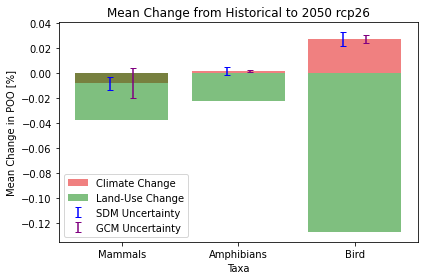

In [21]:

sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
taxas = ["Mammals", "Amphibians","Bird"]  # Add the second taxa here
scenario = "rcp26"
time=65
historical_time=1146

years = ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050',
         '2052', '2056', '2080', '2100', '2150', '2200', '2250']


# Create the dictionaries
newvalue_dict_fut = {}
newvalue_dict_hist = {}
sumbin_dict_future = {}
sumbin_dict_hist = {}

# Initialize the dictionaries with SDM, GCM, and taxa keys
mean_newvalue_change = {}
mean_sum_bin_change = {}
mean_land_use_change = {}

for sdm in sdms:
    newvalue_dict_fut[sdm] = {}
    newvalue_dict_hist[sdm] = {}
    sumbin_dict_future[sdm] = {}
    sumbin_dict_hist[sdm] = {}
    mean_newvalue_change[sdm] = {}
    mean_sum_bin_change[sdm] = {}
    mean_land_use_change[sdm] = {}

    for gcm in gcms:
        newvalue_dict_fut[sdm][gcm] = {}
        newvalue_dict_hist[sdm][gcm] = {}
        sumbin_dict_future[sdm][gcm] = {}
        sumbin_dict_hist[sdm][gcm] = {}
        mean_newvalue_change[sdm][gcm] = {}
        mean_sum_bin_change[sdm][gcm] = {}
        mean_land_use_change[sdm][gcm] = {}

        for taxa in taxas:
            newvalue_dict_fut[sdm][gcm][taxa] = []
            newvalue_dict_hist[sdm][gcm][taxa] = []
            sumbin_dict_future[sdm][gcm][taxa] = []
            sumbin_dict_hist[sdm][gcm][taxa] = []

# Loop over all taxa
for taxa in taxas:
    for sdm in sdms:
        dir_species = "/storage/scratch/users/ch21o450/data/LandClim_Output/" + sdm + "/" + taxa + "/EWEMBI/"
        available_file = os.listdir(dir_species)
        available_names = [x.split("_[1146].nc")[0] for x in available_file]

        species_names = available_names[:100]
        # Define the netCDF file path
        netcdf_path_format_future = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/{}/{}/{}_[{}].nc"
        netcdf_path_format_hist = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/EWEMBI/{}_[{}].nc"

        # Loop over all species
        for species_name in species_names:
            # Loop over all models
            for gcm in gcms:
                # Open the netCDF files
                ds_newvalue_fut = xr.open_dataset(
                    netcdf_path_format_future.format(sdm, taxa, gcm, scenario, species_name, time),
                    decode_times=False
                )
                ds_newvalue_hist = xr.open_dataset(
                    netcdf_path_format_hist.format(sdm, taxa, species_name, historical_time),
                    decode_times=False
                )

                # Get the newvalue and sum_bin
                newvalue_fut = ds_newvalue_fut["newvalue"]
                newvalue_hist = ds_newvalue_hist["newvalue"]
                sum_bin_future = ds_newvalue_fut["sum_bin"].isel(time=0)
                sum_bin_hist = ds_newvalue_hist["sum_bin"].isel(time=0)

                # Append the newvalue to the dictionaries
                newvalue_dict_fut[sdm][gcm][taxa].append(newvalue_fut)
                newvalue_dict_hist[sdm][gcm][taxa].append(newvalue_hist)
                sumbin_dict_future[sdm][gcm][taxa].append(sum_bin_future)
                sumbin_dict_hist[sdm][gcm][taxa].append(sum_bin_hist)

# Calculate the mean change from historical to future per sdm, per gcm, per taxa
for sdm in newvalue_dict_fut:
    for gcm in newvalue_dict_fut[sdm]:
        for taxa in newvalue_dict_fut[sdm][gcm]:
            if len(newvalue_dict_hist[sdm][gcm][taxa]) > 0 and len(newvalue_dict_fut[sdm][gcm][taxa]) > 0:
                newvalue_hist = xr.concat(newvalue_dict_hist[sdm][gcm][taxa], dim="species").mean(dim="species")
                newvalue_future = xr.concat(newvalue_dict_fut[sdm][gcm][taxa], dim="species").mean(dim="species")
                sum_bin_hist =  xr.concat(sumbin_dict_hist[sdm][gcm][taxa], dim="species").mean(dim="species")
                sum_bin_future = xr.concat(sumbin_dict_future[sdm][gcm][taxa], dim="species").mean(dim="species")
                
                climate_change = (newvalue_future - newvalue_hist) * 100  # Calculate change as percentage
                climate_land_change = (sum_bin_future - sum_bin_hist) * 100
                land_use_change = (climate_land_change - climate_change) 

                mean_newvalue_change[sdm][gcm][taxa] = climate_change
                mean_sum_bin_change[sdm][gcm][taxa] = climate_land_change
                mean_land_use_change[sdm][gcm][taxa] = land_use_change


# Calculate the mean change and uncertainties for Mammals
mean_values_mammals = []
mean_land_use_change_mammals = []
uncertainties_sdm_mammals = []
uncertainties_gcm_mammals = []

for sdm in sdms:
    sdm_values = []
    sdm_land_use_values = []
    for gcm in gcms:
        sdm_values.append(mean_newvalue_change[sdm][gcm]["Mammals"].mean().item())
        sdm_land_use_values.append(mean_land_use_change[sdm][gcm]["Mammals"].mean().item())
    mean_values_mammals.append(np.mean(sdm_values))
    mean_land_use_change_mammals.append(np.mean(sdm_land_use_values))
    uncertainties_sdm_mammals.append(np.std(sdm_values))

for gcm in gcms:
    gcm_values = []
    gcm_land_use_values = []
    for sdm in sdms:
        gcm_values.append(mean_newvalue_change[sdm][gcm]["Mammals"].mean().item())
        gcm_land_use_values.append(mean_land_use_change[sdm][gcm]["Mammals"].mean().item())
    uncertainties_gcm_mammals.append(np.std(gcm_values))

# Calculate the mean change and uncertainties for Amphibians
mean_values_amphibians = []
mean_land_use_change_amphibians = []
uncertainties_sdm_amphibians = []
uncertainties_gcm_amphibians = []

for sdm in sdms:
    sdm_values = []
    sdm_land_use_values = []
    for gcm in gcms:
        sdm_values.append(mean_newvalue_change[sdm][gcm]["Amphibians"].mean().item())
        sdm_land_use_values.append(mean_land_use_change[sdm][gcm]["Amphibians"].mean().item())
    mean_values_amphibians.append(np.mean(sdm_values))
    mean_land_use_change_amphibians.append(np.mean(sdm_land_use_values))
    uncertainties_sdm_amphibians.append(np.std(sdm_values))

for gcm in gcms:
    gcm_values = []
    gcm_land_use_values = []
    for sdm in sdms:
        gcm_values.append(mean_newvalue_change[sdm][gcm]["Amphibians"].mean().item())
        gcm_land_use_values.append(mean_land_use_change[sdm][gcm]["Amphibians"].mean().item())
    uncertainties_gcm_amphibians.append(np.std(gcm_values))

    
# Calculate the mean change and uncertainties for Mammals
mean_values_birds = []
mean_land_use_change_birds = []
uncertainties_sdm_birds = []
uncertainties_gcm_birds = []

for sdm in sdms:
    sdm_values = []
    sdm_land_use_values = []
    for gcm in gcms:
        sdm_values.append(mean_newvalue_change[sdm][gcm]["Bird"].mean().item())
        sdm_land_use_values.append(mean_land_use_change[sdm][gcm]["Bird"].mean().item())
    mean_values_birds.append(np.mean(sdm_values))
    mean_land_use_change_birds.append(np.mean(sdm_land_use_values))
    uncertainties_sdm_birds.append(np.std(sdm_values))

for gcm in gcms:
    gcm_values = []
    gcm_land_use_values = []
    for sdm in sdms:
        gcm_values.append(mean_newvalue_change[sdm][gcm]["Bird"].mean().item())
        gcm_land_use_values.append(mean_land_use_change[sdm][gcm]["Bird"].mean().item())
    uncertainties_gcm_birds.append(np.std(gcm_values))
# Set up the bar plot
indices = np.arange(len(taxas))
x_labels = taxas

fig, ax = plt.subplots()

# Plot the mean change and error bars for Mammals

ax.bar(0, mean_values_mammals[0] ,color="lightcoral", label="Climate Change")
ax.bar(0, mean_land_use_change_mammals[0],alpha=0.5,color="green", label="Land-Use Change")

# Plot the SDM uncertainty
ax.errorbar(-0.1, mean_values_mammals[0], yerr=uncertainties_sdm_mammals[0], fmt='none', capsize=3, color="blue", label='SDM Uncertainty')
ax.errorbar(0.1, mean_values_mammals[0], yerr=uncertainties_gcm_mammals[0], fmt='none', capsize=3, color="purple", label='GCM Uncertainty')


# Plot the mean change and error bars for Amphibians
# Plot the mean change
ax.bar(1, mean_values_amphibians[0],color="lightcoral")
ax.bar(1, mean_land_use_change_amphibians[0],alpha=0.5,color="green")

ax.errorbar(0.9, mean_values_amphibians[0], yerr=uncertainties_sdm_amphibians[0],fmt='none', capsize=3, color="blue")
ax.errorbar(1.1, mean_values_amphibians[0], yerr=uncertainties_gcm_amphibians[0],  fmt='none', capsize=3, color="purple")


ax.bar(2, mean_values_birds[0] ,color="lightcoral")
ax.bar(2, mean_land_use_change_birds[0],alpha=0.5,color="green")

# Plot the SDM uncertainty
ax.errorbar(1.9, mean_values_birds[0], yerr=uncertainties_sdm_birds[0], fmt='none', capsize=3, color="blue")
ax.errorbar(2.1, mean_values_birds[0], yerr=uncertainties_gcm_birds[0], fmt='none', capsize=3, color="purple")





# Set labels, ticks, and title
ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change in POO [%]')
ax.set_title('Mean Change from Historical to 2050' + ' ' + scenario)

# Set x-axis ticks and labels
ax.set_xticks(indices)
ax.set_xticklabels(x_labels)

# Display the plot
plt.legend()
plt.tight_layout()
plt.show()

### plot cc and cc+luc

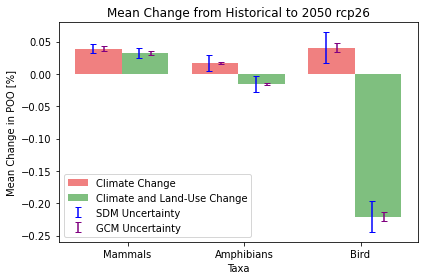

In [20]:

sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
taxas = ["Mammals","Amphibians","Bird"]  # Add the second taxa here
scenario = "rcp26"
time=35
historical_time=1146

years = ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050',
         '2052', '2056', '2080', '2100', '2150', '2200', '2250']


# Create the dictionaries
newvalue_dict_fut = {}
newvalue_dict_hist = {}
sumbin_dict_future = {}
sumbin_dict_hist = {}

# Initialize the dictionaries with SDM, GCM, and taxa keys
mean_newvalue_change = {}
mean_sum_bin_change = {}
mean_land_use_change = {}

for sdm in sdms:
    newvalue_dict_fut[sdm] = {}
    newvalue_dict_hist[sdm] = {}
    sumbin_dict_future[sdm] = {}
    sumbin_dict_hist[sdm] = {}
    mean_newvalue_change[sdm] = {}
    mean_sum_bin_change[sdm] = {}
    mean_land_use_change[sdm] = {}

    for gcm in gcms:
        newvalue_dict_fut[sdm][gcm] = {}
        newvalue_dict_hist[sdm][gcm] = {}
        sumbin_dict_future[sdm][gcm] = {}
        sumbin_dict_hist[sdm][gcm] = {}
        mean_newvalue_change[sdm][gcm] = {}
        mean_sum_bin_change[sdm][gcm] = {}
        mean_land_use_change[sdm][gcm] = {}

        for taxa in taxas:
            newvalue_dict_fut[sdm][gcm][taxa] = []
            newvalue_dict_hist[sdm][gcm][taxa] = []
            sumbin_dict_future[sdm][gcm][taxa] = []
            sumbin_dict_hist[sdm][gcm][taxa] = []

# Loop over all taxa
for taxa in taxas:
    for sdm in sdms:
        dir_species = "/storage/scratch/users/ch21o450/data/LandClim_Output/" + sdm + "/" + taxa + "/EWEMBI/"
        available_file = os.listdir(dir_species)
        available_names = [x.split("_[1146].nc")[0] for x in available_file]

        species_names = available_names[:10]
        # Define the netCDF file path
        netcdf_path_format_future = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/{}/{}/{}_[{}].nc"
        netcdf_path_format_hist = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/EWEMBI/{}_[{}].nc"

        # Loop over all species
        for species_name in species_names:
            # Loop over all models
            for gcm in gcms:
                # Open the netCDF files
                ds_newvalue_fut = xr.open_dataset(
                    netcdf_path_format_future.format(sdm, taxa, gcm, scenario, species_name, time),
                    decode_times=False
                )
                ds_newvalue_hist = xr.open_dataset(
                    netcdf_path_format_hist.format(sdm, taxa, species_name, historical_time),
                    decode_times=False
                )

                # Get the newvalue and sum_bin
                
                newvalue_fut = ds_newvalue_fut["newvalue"]
                newvalue_hist = ds_newvalue_hist["newvalue"]
                sum_bin_future = ds_newvalue_fut["sum_bin"].isel(time=0)
                sum_bin_hist = ds_newvalue_hist["sum_bin"].isel(time=0)

                # Append the newvalue to the dictionaries
                newvalue_dict_fut[sdm][gcm][taxa].append(newvalue_fut)
                newvalue_dict_hist[sdm][gcm][taxa].append(newvalue_hist)
                sumbin_dict_future[sdm][gcm][taxa].append(sum_bin_future)
                sumbin_dict_hist[sdm][gcm][taxa].append(sum_bin_hist)

# Calculate the mean change from historical to future per sdm, per gcm, per taxa
for sdm in newvalue_dict_fut:
    for gcm in newvalue_dict_fut[sdm]:
        for taxa in newvalue_dict_fut[sdm][gcm]:
            if len(newvalue_dict_hist[sdm][gcm][taxa]) > 0 and len(newvalue_dict_fut[sdm][gcm][taxa]) > 0:
                newvalue_hist = xr.concat(newvalue_dict_hist[sdm][gcm][taxa], dim="species").mean(dim="species")
                newvalue_future = xr.concat(newvalue_dict_fut[sdm][gcm][taxa], dim="species").mean(dim="species")
                sum_bin_hist =  xr.concat(sumbin_dict_hist[sdm][gcm][taxa], dim="species").mean(dim="species")
                sum_bin_future = xr.concat(sumbin_dict_future[sdm][gcm][taxa], dim="species").mean(dim="species")
                
                climate_change = (newvalue_future - newvalue_hist) * 100  # Calculate change as percentage
                climate_land_change = (sum_bin_future - sum_bin_hist) * 100
                land_use_change = (climate_land_change - climate_change) 

                mean_newvalue_change[sdm][gcm][taxa] = climate_change
                mean_sum_bin_change[sdm][gcm][taxa] = climate_land_change
                mean_land_use_change[sdm][gcm][taxa] = land_use_change


# Calculate the mean change and uncertainties for Mammals
mean_values_mammals = []
mean_sum_bin_change_mammals = []
mean_land_use_change_mammals = []
uncertainties_sdm_mammals = []
uncertainties_gcm_mammals = []

for sdm in sdms:
    sdm_values = []
    sdm_land_use_values = []
    for gcm in gcms:
        sdm_values.append(mean_newvalue_change[sdm][gcm]["Mammals"].mean().item())
        sdm_land_use_values.append(mean_sum_bin_change[sdm][gcm]["Mammals"].mean().item())
    mean_values_mammals.append(np.mean(sdm_values))
    mean_sum_bin_change_mammals.append(np.mean(sdm_land_use_values))
    uncertainties_sdm_mammals.append(np.std(sdm_values))

for gcm in gcms:
    gcm_values = []
    gcm_land_use_values = []
    for sdm in sdms:
        gcm_values.append(mean_newvalue_change[sdm][gcm]["Mammals"].mean().item())
        gcm_land_use_values.append(mean_sum_bin_change[sdm][gcm]["Mammals"].mean().item())
    uncertainties_gcm_mammals.append(np.std(gcm_values))


# Calculate the mean change and uncertainties for Amphibians
mean_values_amphibians = []
mean_sum_bin_change_amphibians = []
mean_land_use_change_amphibians = []
uncertainties_sdm_amphibians = []
uncertainties_gcm_amphibians = []

for sdm in sdms:
    sdm_values = []
    sdm_land_use_values = []
    for gcm in gcms:
        sdm_values.append(mean_newvalue_change[sdm][gcm]["Amphibians"].mean().item())
        sdm_land_use_values.append(mean_land_use_change[sdm][gcm]["Amphibians"].mean().item())
    mean_values_amphibians.append(np.mean(sdm_values))
    mean_sum_bin_change_amphibians.append(np.mean(sdm_land_use_values))
    uncertainties_sdm_amphibians.append(np.std(sdm_values))

for gcm in gcms:
    gcm_values = []
    gcm_land_use_values = []
    for sdm in sdms:
        gcm_values.append(mean_newvalue_change[sdm][gcm]["Amphibians"].mean().item())
        gcm_land_use_values.append(mean_land_use_change[sdm][gcm]["Amphibians"].mean().item())
    uncertainties_gcm_amphibians.append(np.std(gcm_values))

    
# Calculate the mean change and uncertainties for Birds
mean_values_birds = []
mean_sum_bin_change_birds = []
mean_land_use_change_birds = []
uncertainties_sdm_birds = []
uncertainties_gcm_birds = []

for sdm in sdms:
    sdm_values = []
    sdm_land_use_values = []
    for gcm in gcms:
        sdm_values.append(mean_newvalue_change[sdm][gcm]["Bird"].mean().item())
        sdm_land_use_values.append(mean_land_use_change[sdm][gcm]["Bird"].mean().item())
    mean_values_birds.append(np.mean(sdm_values))
    mean_sum_bin_change_birds.append(np.mean(sdm_land_use_values))
    uncertainties_sdm_birds.append(np.std(sdm_values))

for gcm in gcms:
    gcm_values = []
    gcm_land_use_values = []
    for sdm in sdms:
        gcm_values.append(mean_newvalue_change[sdm][gcm]["Bird"].mean().item())
        gcm_land_use_values.append(mean_land_use_change[sdm][gcm]["Bird"].mean().item())
    uncertainties_gcm_birds.append(np.std(gcm_values))

# Set up the bar plot
indices = [(1,2,3,4,5)]
x_labels = taxas

fig, ax = plt.subplots()

# Plot the mean change and error bars for Mammals

ax.bar(0, mean_values_mammals[0] ,color="lightcoral", label="Climate Change")
ax.bar(0.8, mean_sum_bin_change_mammals[0],alpha=0.5,color="green", label="Climate and Land-Use Change")

# Plot the SDM uncertainty
ax.errorbar(-0.1, mean_values_mammals[0], yerr=uncertainties_sdm_mammals[0], fmt='none', capsize=3, color="blue", label='SDM Uncertainty')
ax.errorbar(0.1, mean_values_mammals[0], yerr=uncertainties_gcm_mammals[0], fmt='none', capsize=3, color="purple", label='GCM Uncertainty')

ax.errorbar(0.7, mean_sum_bin_change_mammals[0], yerr=uncertainties_sdm_mammals[0], fmt='none', capsize=3, color="blue")
ax.errorbar(0.9, mean_sum_bin_change_mammals[0], yerr=uncertainties_gcm_mammals[0], fmt='none', capsize=3, color="purple")


# Plot the mean change and error bars for Amphibians
# Plot the mean change
ax.bar(2, mean_values_amphibians[0],color="lightcoral")
ax.bar(2.8, mean_sum_bin_change_amphibians[0],alpha=0.5,color="green")

ax.errorbar(1.9, mean_values_amphibians[0], yerr=uncertainties_sdm_amphibians[0],fmt='none', capsize=3, color="blue")
ax.errorbar(2.1, mean_values_amphibians[0], yerr=uncertainties_gcm_amphibians[0],  fmt='none', capsize=3, color="purple")

ax.errorbar(2.7, mean_sum_bin_change_amphibians[0], yerr=uncertainties_sdm_amphibians[0],fmt='none', capsize=3, color="blue")
ax.errorbar(2.9, mean_sum_bin_change_amphibians[0], yerr=uncertainties_gcm_amphibians[0],  fmt='none', capsize=3, color="purple")


# Plot the mean change and error bars for Birds

ax.bar(4, mean_values_birds[0] ,color="lightcoral")
ax.bar(4.8, mean_sum_bin_change_birds[0],alpha=0.5,color="green")

# Plot the SDM uncertainty
ax.errorbar(3.9, mean_values_birds[0], yerr=uncertainties_sdm_birds[0], fmt='none', capsize=3, color="blue")
ax.errorbar(4.1, mean_values_birds[0], yerr=uncertainties_gcm_birds[0], fmt='none', capsize=3, color="purple")

ax.errorbar(4.7, mean_sum_bin_change_birds[0], yerr=uncertainties_sdm_birds[0], fmt='none', capsize=3, color="blue")
ax.errorbar(4.9, mean_sum_bin_change_birds[0], yerr=uncertainties_gcm_birds[0], fmt='none', capsize=3, color="purple")




# Set labels, ticks, and title
ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change in POO [%]')
ax.set_title('Mean Change from Historical to 2050' + ' ' + scenario)

# Set x-axis ticks and labels
ax.set_xticks([0.5, 2.5,4.5])
ax.set_xticklabels(x_labels)

# Display the plot
plt.legend()
plt.tight_layout()
plt.show()

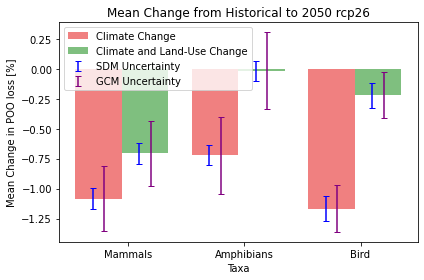

In [31]:
### only consider loss 

sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
taxas = ["Mammals","Amphibians","Bird"]  # Add the second taxa here
scenario = "rcp26"
time=35
historical_time=1146

years = ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050',
         '2052', '2056', '2080', '2100', '2150', '2200', '2250']


# Create the dictionaries
newvalue_dict_fut = {}
newvalue_dict_hist = {}
sumbin_dict_future = {}
sumbin_dict_hist = {}

# Initialize the dictionaries with SDM, GCM, and taxa keys
mean_newvalue_change = {}
mean_sum_bin_change = {}
mean_land_use_change = {}

for sdm in sdms:
    newvalue_dict_fut[sdm] = {}
    newvalue_dict_hist[sdm] = {}
    sumbin_dict_future[sdm] = {}
    sumbin_dict_hist[sdm] = {}
    mean_newvalue_change[sdm] = {}
    mean_sum_bin_change[sdm] = {}
    mean_land_use_change[sdm] = {}

    for gcm in gcms:
        newvalue_dict_fut[sdm][gcm] = {}
        newvalue_dict_hist[sdm][gcm] = {}
        sumbin_dict_future[sdm][gcm] = {}
        sumbin_dict_hist[sdm][gcm] = {}
        mean_newvalue_change[sdm][gcm] = {}
        mean_sum_bin_change[sdm][gcm] = {}
        mean_land_use_change[sdm][gcm] = {}

        for taxa in taxas:
            newvalue_dict_fut[sdm][gcm][taxa] = []
            newvalue_dict_hist[sdm][gcm][taxa] = []
            sumbin_dict_future[sdm][gcm][taxa] = []
            sumbin_dict_hist[sdm][gcm][taxa] = []

# Loop over all taxa
for taxa in taxas:
    for sdm in sdms:
        dir_species = "/storage/scratch/users/ch21o450/data/LandClim_Output/" + sdm + "/" + taxa + "/EWEMBI/"
        available_file = os.listdir(dir_species)
        available_names = [x.split("_[1146].nc")[0] for x in available_file]

        species_names = available_names[:10]
        # Define the netCDF file path
        netcdf_path_format_future = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/{}/{}/{}_[{}].nc"
        netcdf_path_format_hist = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/EWEMBI/{}_[{}].nc"

        # Loop over all species
        for species_name in species_names:
            # Loop over all models
            for gcm in gcms:
                # Open the netCDF files
                ds_newvalue_fut = xr.open_dataset(
                    netcdf_path_format_future.format(sdm, taxa, gcm, scenario, species_name, time),
                    decode_times=False
                )
                ds_newvalue_hist = xr.open_dataset(
                    netcdf_path_format_hist.format(sdm, taxa, species_name, historical_time),
                    decode_times=False
                )

                # Get the newvalue and sum_bin
                
                newvalue_fut = ds_newvalue_fut["newvalue"]
                newvalue_hist = ds_newvalue_hist["newvalue"]
                sum_bin_future = ds_newvalue_fut["sum_bin"].isel(time=0)
                sum_bin_hist = ds_newvalue_hist["sum_bin"].isel(time=0)

                # Append the newvalue to the dictionaries
                newvalue_dict_fut[sdm][gcm][taxa].append(newvalue_fut)
                newvalue_dict_hist[sdm][gcm][taxa].append(newvalue_hist)
                sumbin_dict_future[sdm][gcm][taxa].append(sum_bin_future)
                sumbin_dict_hist[sdm][gcm][taxa].append(sum_bin_hist)

# Calculate the mean change from historical to future per sdm, per gcm, per taxa
for sdm in newvalue_dict_fut:
    for gcm in newvalue_dict_fut[sdm]:
        for taxa in newvalue_dict_fut[sdm][gcm]:
            if len(newvalue_dict_hist[sdm][gcm][taxa]) > 0 and len(newvalue_dict_fut[sdm][gcm][taxa]) > 0:
                newvalue_hist = xr.concat(newvalue_dict_hist[sdm][gcm][taxa], dim="species").mean(dim="species")
                newvalue_future = xr.concat(newvalue_dict_fut[sdm][gcm][taxa], dim="species").mean(dim="species")
                sum_bin_hist =  xr.concat(sumbin_dict_hist[sdm][gcm][taxa], dim="species").mean(dim="species")
                sum_bin_future = xr.concat(sumbin_dict_future[sdm][gcm][taxa], dim="species").mean(dim="species")
                                
                climate_change = (newvalue_future - newvalue_hist) * 100  # Calculate change as percentage
                climate_land_change = (sum_bin_future - sum_bin_hist) * 100
                land_use_change = (climate_land_change - climate_change) 
                
                climate_change_loss = climate_change.where(climate_change < 0)
                climate_land_change_loss = climate_land_change.where(climate_land_change<0)

                  
                land_use_change = (climate_land_change - climate_change) 

                mean_newvalue_change[sdm][gcm][taxa] = climate_change_loss
                mean_sum_bin_change[sdm][gcm][taxa] = climate_land_change_loss
                mean_land_use_change[sdm][gcm][taxa] = land_use_change


# Calculate the mean change and uncertainties for Mammals
mean_values_mammals = []
mean_sum_bin_change_mammals = []
mean_land_use_change_mammals = []
uncertainties_sdm_mammals = []
uncertainties_gcm_mammals = []

for sdm in sdms:
    sdm_values = []
    sdm_land_use_values = []
    for gcm in gcms:
        sdm_values.append(mean_newvalue_change[sdm][gcm]["Mammals"].mean().item())
        sdm_land_use_values.append(mean_sum_bin_change[sdm][gcm]["Mammals"].mean().item())
    mean_values_mammals.append(np.mean(sdm_values))
    mean_sum_bin_change_mammals.append(np.mean(sdm_land_use_values))
    uncertainties_sdm_mammals.append(np.std(sdm_values))

for gcm in gcms:
    gcm_values = []
    gcm_land_use_values = []
    for sdm in sdms:
        gcm_values.append(mean_newvalue_change[sdm][gcm]["Mammals"].mean().item())
        gcm_land_use_values.append(mean_sum_bin_change[sdm][gcm]["Mammals"].mean().item())
    uncertainties_gcm_mammals.append(np.std(gcm_values))


# Calculate the mean change and uncertainties for Amphibians
mean_values_amphibians = []
mean_sum_bin_change_amphibians = []
mean_land_use_change_amphibians = []
uncertainties_sdm_amphibians = []
uncertainties_gcm_amphibians = []

for sdm in sdms:
    sdm_values = []
    sdm_land_use_values = []
    for gcm in gcms:
        sdm_values.append(mean_newvalue_change[sdm][gcm]["Amphibians"].mean().item())
        sdm_land_use_values.append(mean_land_use_change[sdm][gcm]["Amphibians"].mean().item())
    mean_values_amphibians.append(np.mean(sdm_values))
    mean_sum_bin_change_amphibians.append(np.mean(sdm_land_use_values))
    uncertainties_sdm_amphibians.append(np.std(sdm_values))

for gcm in gcms:
    gcm_values = []
    gcm_land_use_values = []
    for sdm in sdms:
        gcm_values.append(mean_newvalue_change[sdm][gcm]["Amphibians"].mean().item())
        gcm_land_use_values.append(mean_land_use_change[sdm][gcm]["Amphibians"].mean().item())
    uncertainties_gcm_amphibians.append(np.std(gcm_values))

    
# Calculate the mean change and uncertainties for Birds
mean_values_birds = []
mean_sum_bin_change_birds = []
mean_land_use_change_birds = []
uncertainties_sdm_birds = []
uncertainties_gcm_birds = []

for sdm in sdms:
    sdm_values = []
    sdm_land_use_values = []
    for gcm in gcms:
        sdm_values.append(mean_newvalue_change[sdm][gcm]["Bird"].mean().item())
        sdm_land_use_values.append(mean_land_use_change[sdm][gcm]["Bird"].mean().item())
    mean_values_birds.append(np.mean(sdm_values))
    mean_sum_bin_change_birds.append(np.mean(sdm_land_use_values))
    uncertainties_sdm_birds.append(np.std(sdm_values))

for gcm in gcms:
    gcm_values = []
    gcm_land_use_values = []
    for sdm in sdms:
        gcm_values.append(mean_newvalue_change[sdm][gcm]["Bird"].mean().item())
        gcm_land_use_values.append(mean_land_use_change[sdm][gcm]["Bird"].mean().item())
    uncertainties_gcm_birds.append(np.std(gcm_values))

# Set up the bar plot
indices = [(1,2,3,4,5)]
x_labels = taxas

fig, ax = plt.subplots()

# Plot the mean change and error bars for Mammals



ax.bar(0, mean_values_mammals[0] ,color="lightcoral", label="Climate Change")
ax.bar(0.8, mean_sum_bin_change_mammals[0],alpha=0.5,color="green", label="Climate and Land-Use Change")

# Plot the SDM uncertainty
ax.errorbar(-0.1, mean_values_mammals[0], yerr=uncertainties_sdm_mammals[0], fmt='none', capsize=3, color="blue", label='SDM Uncertainty')
ax.errorbar(0.1, mean_values_mammals[0], yerr=uncertainties_gcm_mammals[0], fmt='none', capsize=3, color="purple", label='GCM Uncertainty')

ax.errorbar(0.7, mean_sum_bin_change_mammals[0], yerr=uncertainties_sdm_mammals[0], fmt='none', capsize=3, color="blue")
ax.errorbar(0.9, mean_sum_bin_change_mammals[0], yerr=uncertainties_gcm_mammals[0], fmt='none', capsize=3, color="purple")


# Plot the mean change and error bars for Amphibians
# Plot the mean change
ax.bar(2, mean_values_amphibians[0],color="lightcoral")
ax.bar(2.8, mean_sum_bin_change_amphibians[0],alpha=0.5,color="green")

ax.errorbar(1.9, mean_values_amphibians[0], yerr=uncertainties_sdm_amphibians[0],fmt='none', capsize=3, color="blue")
ax.errorbar(2.1, mean_values_amphibians[0], yerr=uncertainties_gcm_amphibians[0],  fmt='none', capsize=3, color="purple")

ax.errorbar(2.7, mean_sum_bin_change_amphibians[0], yerr=uncertainties_sdm_amphibians[0],fmt='none', capsize=3, color="blue")
ax.errorbar(2.9, mean_sum_bin_change_amphibians[0], yerr=uncertainties_gcm_amphibians[0],  fmt='none', capsize=3, color="purple")


# Plot the mean change and error bars for Birds

ax.bar(4, mean_values_birds[0] ,color="lightcoral")
ax.bar(4.8, mean_sum_bin_change_birds[0],alpha=0.5,color="green")

# Plot the SDM uncertainty
ax.errorbar(3.9, mean_values_birds[0], yerr=uncertainties_sdm_birds[0], fmt='none', capsize=3, color="blue")
ax.errorbar(4.1, mean_values_birds[0], yerr=uncertainties_gcm_birds[0], fmt='none', capsize=3, color="purple")

ax.errorbar(4.7, mean_sum_bin_change_birds[0], yerr=uncertainties_sdm_birds[0], fmt='none', capsize=3, color="blue")
ax.errorbar(4.9, mean_sum_bin_change_birds[0], yerr=uncertainties_gcm_birds[0], fmt='none', capsize=3, color="purple")




# Set labels, ticks, and title
ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change in POO loss [%]')
ax.set_title('Mean Change from Historical to 2050' + ' ' + scenario)

# Set x-axis ticks and labels
ax.set_xticks([0.5, 2.5,4.5])
ax.set_xticklabels(x_labels)

# Display the plot
plt.legend()
plt.tight_layout()
plt.show()

/storage/homefs/ch21o450/.local/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/storage/homefs/ch21o450/.local/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


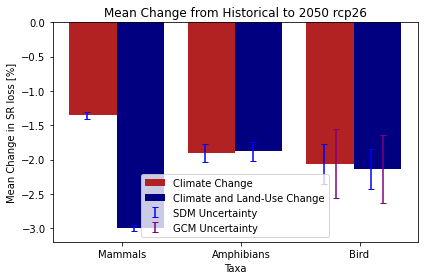

In [12]:
#species richness
### only consider loss 

sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
taxas = ["Mammals","Amphibians","Bird"]  # Add the second taxa here
scenario = "rcp26"
time=35
historical_time=1146

years = ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050',
         '2052', '2056', '2080', '2100', '2150', '2200', '2250']


# Create the dictionaries
newvalue_dict_fut = {}
newvalue_dict_hist = {}
sumbin_dict_future = {}
sumbin_dict_hist = {}

# Initialize the dictionaries with SDM, GCM, and taxa keys
mean_newvalue_change = {}
mean_sum_bin_change = {}
mean_land_use_change = {}

for sdm in sdms:
    newvalue_dict_fut[sdm] = {}
    newvalue_dict_hist[sdm] = {}
    sumbin_dict_future[sdm] = {}
    sumbin_dict_hist[sdm] = {}
    mean_newvalue_change[sdm] = {}
    mean_sum_bin_change[sdm] = {}
    mean_land_use_change[sdm] = {}

    for gcm in gcms:
        newvalue_dict_fut[sdm][gcm] = {}
        newvalue_dict_hist[sdm][gcm] = {}
        sumbin_dict_future[sdm][gcm] = {}
        sumbin_dict_hist[sdm][gcm] = {}
        mean_newvalue_change[sdm][gcm] = {}
        mean_sum_bin_change[sdm][gcm] = {}
        mean_land_use_change[sdm][gcm] = {}

        for taxa in taxas:
            newvalue_dict_fut[sdm][gcm][taxa] = []
            newvalue_dict_hist[sdm][gcm][taxa] = []
            sumbin_dict_future[sdm][gcm][taxa] = []
            sumbin_dict_hist[sdm][gcm][taxa] = []

# Loop over all taxa
for taxa in taxas:
    for sdm in sdms:
        dir_species = "/storage/scratch/users/ch21o450/data/LandClim_Output/" + sdm + "/" + taxa + "/EWEMBI/"
        available_file = os.listdir(dir_species)
        available_names = [x.split("_[1146].nc")[0] for x in available_file]

        species_names = available_names[:100]
        # Define the netCDF file path
        netcdf_path_format_future = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/{}/{}/{}_[{}].nc"
        netcdf_path_format_hist = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/EWEMBI/{}_[{}].nc"

        # Loop over all species
        for species_name in species_names:
            # Loop over all models
            for gcm in gcms:
                # Open the netCDF files
                ds_newvalue_fut = xr.open_dataset(
                    netcdf_path_format_future.format(sdm, taxa, gcm, scenario, species_name, time),
                    decode_times=False
                )
                ds_newvalue_hist = xr.open_dataset(
                    netcdf_path_format_hist.format(sdm, taxa, species_name, historical_time),
                    decode_times=False
                )

                # Get the newvalue and sum_bin
                
                newvalue_fut = ds_newvalue_fut["newvalue"]>0
                newvalue_hist = ds_newvalue_hist["newvalue"]>0
                sum_bin_future = ds_newvalue_fut["sum_bin"].isel(time=0)>0
                sum_bin_hist = ds_newvalue_hist["sum_bin"].isel(time=0)>0

                # Append the newvalue to the dictionaries
                newvalue_dict_fut[sdm][gcm][taxa].append(newvalue_fut)
                newvalue_dict_hist[sdm][gcm][taxa].append(newvalue_hist)
                sumbin_dict_future[sdm][gcm][taxa].append(sum_bin_future)
                sumbin_dict_hist[sdm][gcm][taxa].append(sum_bin_hist)

# Calculate the mean change from historical to future per sdm, per gcm, per taxa
for sdm in newvalue_dict_fut:
    for gcm in newvalue_dict_fut[sdm]:
        for taxa in newvalue_dict_fut[sdm][gcm]:
            if len(newvalue_dict_hist[sdm][gcm][taxa]) > 0 and len(newvalue_dict_fut[sdm][gcm][taxa]) > 0:
                newvalue_hist = xr.concat(newvalue_dict_hist[sdm][gcm][taxa], dim="species").sum(dim="species")
                newvalue_future = xr.concat(newvalue_dict_fut[sdm][gcm][taxa], dim="species").sum(dim="species")
                sum_bin_hist =  xr.concat(sumbin_dict_hist[sdm][gcm][taxa], dim="species").sum(dim="species")
                sum_bin_future = xr.concat(sumbin_dict_future[sdm][gcm][taxa], dim="species").sum(dim="species")
                                
                climate_change = (newvalue_future - newvalue_hist)  # Calculate change as percentage
                climate_land_change = (sum_bin_future - sum_bin_hist)
                land_use_change = (climate_land_change - climate_change) 
                
                climate_change_loss = climate_change.where(climate_change < 0)
                climate_land_change_loss = climate_land_change.where(climate_land_change<0)

                  
                land_use_change = (climate_land_change - climate_change) 

                mean_newvalue_change[sdm][gcm][taxa] = climate_change_loss
                mean_sum_bin_change[sdm][gcm][taxa] = climate_land_change_loss
                mean_land_use_change[sdm][gcm][taxa] = land_use_change


# Calculate the mean change and uncertainties for Mammals
mean_values_mammals = []
mean_sum_bin_change_mammals = []
mean_land_use_change_mammals = []
uncertainties_sdm_mammals = []
uncertainties_gcm_mammals = []

for sdm in sdms:
    sdm_values = []
    sdm_land_use_values = []
    for gcm in gcms:
        sdm_values.append(mean_newvalue_change[sdm][gcm]["Mammals"].mean().item())
        sdm_land_use_values.append(mean_sum_bin_change[sdm][gcm]["Mammals"].mean().item())
    mean_values_mammals.append(np.mean(sdm_values))
    mean_sum_bin_change_mammals.append(np.mean(sdm_land_use_values))
    uncertainties_sdm_mammals.append(np.std(sdm_values))

for gcm in gcms:
    gcm_values = []
    gcm_land_use_values = []
    for sdm in sdms:
        gcm_values.append(mean_newvalue_change[sdm][gcm]["Mammals"].mean().item())
        gcm_land_use_values.append(mean_sum_bin_change[sdm][gcm]["Mammals"].mean().item())
    uncertainties_gcm_mammals.append(np.std(gcm_values))


# Calculate the mean change and uncertainties for Amphibians
mean_values_amphibians = []
mean_sum_bin_change_amphibians = []
mean_land_use_change_amphibians = []
uncertainties_sdm_amphibians = []
uncertainties_gcm_amphibians = []

for sdm in sdms:
    sdm_values = []
    sdm_land_use_values = []
    for gcm in gcms:
        sdm_values.append(mean_newvalue_change[sdm][gcm]["Amphibians"].mean().item())
        sdm_land_use_values.append(mean_sum_bin_change[sdm][gcm]["Amphibians"].mean().item())
    mean_values_amphibians.append(np.mean(sdm_values))
    mean_sum_bin_change_amphibians.append(np.mean(sdm_land_use_values))
    uncertainties_sdm_amphibians.append(np.std(sdm_values))

for gcm in gcms:
    gcm_values = []
    gcm_land_use_values = []
    for sdm in sdms:
        gcm_values.append(mean_newvalue_change[sdm][gcm]["Amphibians"].mean().item())
        gcm_land_use_values.append(mean_sum_bin_change[sdm][gcm]["Amphibians"].mean().item())
    uncertainties_gcm_amphibians.append(np.std(gcm_values))

    
# Calculate the mean change and uncertainties for Birds
mean_values_birds = []
mean_sum_bin_change_birds = []
mean_land_use_change_birds = []
uncertainties_sdm_birds = []
uncertainties_gcm_birds = []

for sdm in sdms:
    sdm_values = []
    sdm_land_use_values = []
    for gcm in gcms:
        sdm_values.append(mean_newvalue_change[sdm][gcm]["Bird"].mean().item())
        sdm_land_use_values.append(mean_sum_bin_change[sdm][gcm]["Bird"].mean().item())
    mean_values_birds.append(np.mean(sdm_values))
    mean_sum_bin_change_birds.append(np.mean(sdm_land_use_values))
    uncertainties_sdm_birds.append(np.std(sdm_values))

for gcm in gcms:
    gcm_values = []
    gcm_land_use_values = []
    for sdm in sdms:
        gcm_values.append(mean_newvalue_change[sdm][gcm]["Bird"].mean().item())
        gcm_land_use_values.append(mean_sum_bin_change[sdm][gcm]["Bird"].mean().item())
    uncertainties_gcm_birds.append(np.std(gcm_values))

# Set up the bar plot
indices = [(1,2,3,4,5)]
x_labels = taxas

fig, ax = plt.subplots()

# Plot the mean change and error bars for Mammals



ax.bar(0, mean_values_mammals[0] ,color="firebrick", label="Climate Change")
ax.bar(0.8, mean_sum_bin_change_mammals[0],alpha=1,color="navy", label="Climate and Land-Use Change")

# Plot the SDM uncertainty
ax.errorbar(-0.1, mean_values_mammals[0], yerr=uncertainties_sdm_mammals[0], fmt='none', capsize=3, color="blue", label='SDM Uncertainty')
ax.errorbar(0.1, mean_values_mammals[0], yerr=uncertainties_gcm_mammals[0], fmt='none', capsize=3, color="purple", label='GCM Uncertainty')

ax.errorbar(0.7, mean_sum_bin_change_mammals[0], yerr=uncertainties_sdm_mammals[0], fmt='none', capsize=3, color="blue")
ax.errorbar(0.9, mean_sum_bin_change_mammals[0], yerr=uncertainties_gcm_mammals[0], fmt='none', capsize=3, color="purple")


# Plot the mean change and error bars for Amphibians
# Plot the mean change
ax.bar(2, mean_values_amphibians[0],color="firebrick")
ax.bar(2.8, mean_sum_bin_change_amphibians[0],alpha=1,color="navy")

ax.errorbar(1.9, mean_values_amphibians[0], yerr=uncertainties_sdm_amphibians[0],fmt='none', capsize=3, color="blue")
ax.errorbar(2.1, mean_values_amphibians[0], yerr=uncertainties_gcm_amphibians[0],  fmt='none', capsize=3, color="purple")

ax.errorbar(2.7, mean_sum_bin_change_amphibians[0], yerr=uncertainties_sdm_amphibians[0],fmt='none', capsize=3, color="blue")
ax.errorbar(2.9, mean_sum_bin_change_amphibians[0], yerr=uncertainties_gcm_amphibians[0],  fmt='none', capsize=3, color="purple")


# Plot the mean change and error bars for Birds

ax.bar(4, mean_values_birds[0] ,color="firebrick")
ax.bar(4.8, mean_sum_bin_change_birds[0],alpha=1,color="navy")

# Plot the SDM uncertainty
ax.errorbar(3.9, mean_values_birds[0], yerr=uncertainties_sdm_birds[0], fmt='none', capsize=3, color="blue")
ax.errorbar(4.1, mean_values_birds[0], yerr=uncertainties_gcm_birds[0], fmt='none', capsize=3, color="purple")

ax.errorbar(4.7, mean_sum_bin_change_birds[0], yerr=uncertainties_sdm_birds[0], fmt='none', capsize=3, color="blue")
ax.errorbar(4.9, mean_sum_bin_change_birds[0], yerr=uncertainties_gcm_birds[0], fmt='none', capsize=3, color="purple")




# Set labels, ticks, and title
ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change in SR loss [%]')
ax.set_title('Mean Change from Historical to 2050' + ' ' + scenario)

# Set x-axis ticks and labels
ax.set_xticks([0.5, 2.5,4.5])
ax.set_xticklabels(x_labels)

# Display the plot
plt.legend()
plt.tight_layout()
plt.show()

In [82]:
time


35

In [83]:
time = int(args.time[0])

NameError: name 'args' is not defined

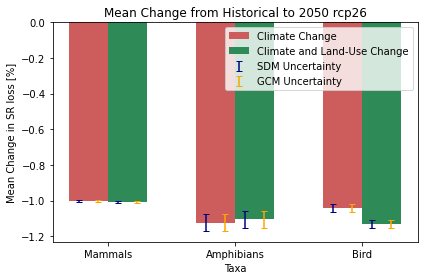

In [81]:
#species richness
### only consider loss 

sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
taxas = ["Mammals","Amphibians","Bird"]  # Add the second taxa here
scenario = "rcp26"
time=35
historical_time=1146

years = ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050',
         '2052', '2056', '2080', '2100', '2150', '2200', '2250']


# Create the dictionaries
newvalue_dict_fut = {}
newvalue_dict_hist = {}
sumbin_dict_future = {}
sumbin_dict_hist = {}

# Initialize the dictionaries with SDM, GCM, and taxa keys
mean_newvalue_change = {}
mean_sum_bin_change = {}
mean_land_use_change = {}

for sdm in sdms:
    newvalue_dict_fut[sdm] = {}
    newvalue_dict_hist[sdm] = {}
    sumbin_dict_future[sdm] = {}
    sumbin_dict_hist[sdm] = {}
    mean_newvalue_change[sdm] = {}
    mean_sum_bin_change[sdm] = {}
    mean_land_use_change[sdm] = {}

    for gcm in gcms:
        newvalue_dict_fut[sdm][gcm] = {}
        newvalue_dict_hist[sdm][gcm] = {}
        sumbin_dict_future[sdm][gcm] = {}
        sumbin_dict_hist[sdm][gcm] = {}
        mean_newvalue_change[sdm][gcm] = {}
        mean_sum_bin_change[sdm][gcm] = {}
        mean_land_use_change[sdm][gcm] = {}

        for taxa in taxas:
            newvalue_dict_fut[sdm][gcm][taxa] = []
            newvalue_dict_hist[sdm][gcm][taxa] = []
            sumbin_dict_future[sdm][gcm][taxa] = []
            sumbin_dict_hist[sdm][gcm][taxa] = []

# Loop over all taxa
for taxa in taxas:
    for sdm in sdms:
        dir_species = "/storage/scratch/users/ch21o450/data/LandClim_Output/" + sdm + "/" + taxa + "/EWEMBI/"
        available_file = os.listdir(dir_species)
        available_names = [x.split("_[1146].nc")[0] for x in available_file]

        species_names = available_names[:10]
        # Define the netCDF file path
        netcdf_path_format_future = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/{}/{}/{}_[{}].nc"
        netcdf_path_format_hist = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/EWEMBI/{}_[{}].nc"

        # Loop over all species
        for species_name in species_names:
            # Loop over all models
            for gcm in gcms:
                # Open the netCDF files
                ds_newvalue_fut = xr.open_dataset(
                    netcdf_path_format_future.format(sdm, taxa, gcm, scenario, species_name, time),
                    decode_times=False
                )
                ds_newvalue_hist = xr.open_dataset(
                    netcdf_path_format_hist.format(sdm, taxa, species_name, historical_time),
                    decode_times=False
                )

                # Get the newvalue and sum_bin
                
                newvalue_fut = ds_newvalue_fut["newvalue"]>0
                newvalue_hist = ds_newvalue_hist["newvalue"]>0
                sum_bin_future = ds_newvalue_fut["sum_bin"].isel(time=0)>0
                sum_bin_hist = ds_newvalue_hist["sum_bin"].isel(time=0)>0

                # Append the newvalue to the dictionaries
                newvalue_dict_fut[sdm][gcm][taxa].append(newvalue_fut)
                newvalue_dict_hist[sdm][gcm][taxa].append(newvalue_hist)
                sumbin_dict_future[sdm][gcm][taxa].append(sum_bin_future)
                sumbin_dict_hist[sdm][gcm][taxa].append(sum_bin_hist)

# Calculate the mean change from historical to future per sdm, per gcm, per taxa
for sdm in newvalue_dict_fut:
    for gcm in newvalue_dict_fut[sdm]:
        for taxa in newvalue_dict_fut[sdm][gcm]:
            if len(newvalue_dict_hist[sdm][gcm][taxa]) > 0 and len(newvalue_dict_fut[sdm][gcm][taxa]) > 0:
                newvalue_hist = xr.concat(newvalue_dict_hist[sdm][gcm][taxa], dim="species").sum(dim="species")
                newvalue_future = xr.concat(newvalue_dict_fut[sdm][gcm][taxa], dim="species").sum(dim="species")
                sum_bin_hist =  xr.concat(sumbin_dict_hist[sdm][gcm][taxa], dim="species").sum(dim="species")
                sum_bin_future = xr.concat(sumbin_dict_future[sdm][gcm][taxa], dim="species").sum(dim="species")
                                
                climate_change = (newvalue_future - newvalue_hist)  # Calculate change as percentage
                climate_land_change = (sum_bin_future - sum_bin_hist)
                land_use_change = (climate_land_change - climate_change) 
                
                climate_change_loss = climate_change.where(climate_change < 0)
                climate_land_change_loss = climate_land_change.where(climate_land_change<0)

                  
                land_use_change = (climate_land_change - climate_change) 

                mean_newvalue_change[sdm][gcm][taxa] = climate_change_loss
                mean_sum_bin_change[sdm][gcm][taxa] = climate_land_change_loss
                mean_land_use_change[sdm][gcm][taxa] = land_use_change
# Calculate the mean change and uncertainties for Mammals, Amphibians, and Birds
mean_values = {}
mean_sum_bin_change_taxa = {}  # Rename this to avoid conflicts
uncertainties_sdm_taxa = {}     # Rename this to avoid conflicts
uncertainties_gcm_taxa = {}     # Rename this to avoid conflicts

for taxa in taxas:
    mean_values[taxa] = []
    mean_sum_bin_change_taxa[taxa] = []  # Update the dictionary name
    uncertainties_sdm_taxa[taxa] = []     # Update the dictionary name
    uncertainties_gcm_taxa[taxa] = []     # Update the dictionary name
    
    for sdm in sdms:
        sdm_values = []
        sdm_land_use_values = []
        for gcm in gcms:
            sdm_values.append(mean_newvalue_change[sdm][gcm][taxa].mean().item())
            sdm_land_use_values.append(mean_sum_bin_change[sdm][gcm][taxa].mean().item())
        mean_values[taxa].append(np.mean(sdm_values))
        mean_sum_bin_change_taxa[taxa].append(np.mean(sdm_land_use_values))
        uncertainties_sdm_taxa[taxa].append(np.std(sdm_values))

        gcm_values = []  # Moved this block inside the 'taxa' loop
        gcm_land_use_values = []  # Moved this block inside the 'taxa' loop
        for gcm in gcms:
            gcm_values.append(mean_newvalue_change[sdm][gcm][taxa].mean().item())
            gcm_land_use_values.append(mean_sum_bin_change[sdm][gcm][taxa].mean().item())
        uncertainties_gcm_taxa[taxa].append(np.std(gcm_values))
        
# Set up the bar plot
indices = [(1,2,3,4,5)]
x_labels = taxas

fig, ax = plt.subplots()

taxa_list = ["Mammals", "Amphibians", "Bird"]
color_change = "indianred"  # A shade of orange
color_land_use_change = "seagreen"  # A shade of blue
color_sdm_uncertainty = "navy"  # A shade of green
color_gcm_uncertainty = "orange"  # A shade of purple


bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(taxa_list)) * (2 * bar_width + 0.5)

for i, taxa in enumerate(taxa_list):
    x_shift = x_positions[i]


    if not i:
        ax.bar(x_shift, mean_values[taxa][0], width=bar_width, color=color_change, label='Climate Change')
        ax.bar(x_shift + bar_width, mean_sum_bin_change_taxa[taxa][0], width=bar_width, alpha=1, color=color_land_use_change, label='Climate and Land-Use Change')    
        ax.errorbar(x_shift - error_bar_shift, mean_values[taxa][0], yerr=uncertainties_sdm_taxa[taxa][0], fmt='none', capsize=3, color=color_sdm_uncertainty, label='SDM Uncertainty')
        ax.errorbar(x_shift + error_bar_shift, mean_values[taxa][0], yerr=uncertainties_gcm_taxa[taxa][0], fmt='none', capsize=3, color=color_gcm_uncertainty, label='GCM Uncertainty')
        ax.errorbar(x_shift + bar_width - error_bar_shift, mean_sum_bin_change_taxa[taxa][0], yerr=uncertainties_sdm_taxa[taxa][0], fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, mean_sum_bin_change_taxa[taxa][0], yerr=uncertainties_gcm_taxa[taxa][0], fmt='none', capsize=3, color=color_gcm_uncertainty)
    else:
        ax.bar(x_shift, mean_values[taxa][0], width=bar_width, color=color_change)
        ax.bar(x_shift + bar_width, mean_sum_bin_change_taxa[taxa][0], width=bar_width, alpha=1, color=color_land_use_change)  
        ax.errorbar(x_shift - error_bar_shift, mean_values[taxa][0], yerr=uncertainties_sdm_taxa[taxa][0], fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + error_bar_shift, mean_values[taxa][0], yerr=uncertainties_gcm_taxa[taxa][0], fmt='none', capsize=3, color=color_gcm_uncertainty)
        ax.errorbar(x_shift + bar_width - error_bar_shift, mean_sum_bin_change_taxa[taxa][0], yerr=uncertainties_sdm_taxa[taxa][0], fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, mean_sum_bin_change_taxa[taxa][0], yerr=uncertainties_gcm_taxa[taxa][0], fmt='none', capsize=3, color=color_gcm_uncertainty)

# Set up the x-axis labels and ticks
ax.set_xticks(x_positions + bar_width*0.5)
ax.set_xticklabels(taxa_list)


# Set labels, ticks, and title
ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change in SR loss [%]')
ax.set_title('Mean Change from Historical to 2050' + ' ' + scenario)

ax.legend()

# Display the plot
plt.legend()
plt.tight_layout()
plt.show()

In [36]:
i

2

In [9]:
uncertainties_gcm_mammals


[nan, nan, nan, nan]

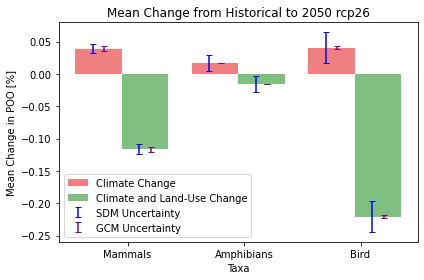

In [41]:
#same but simpler (not loss, not SR)
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

def read_data(sdm, taxa, gcm, scenario, species_name, time, historical_time):
    dir_species = f"/storage/scratch/users/ch21o450/data/LandClim_Output/{sdm}/{taxa}/EWEMBI/"
    available_file = os.listdir(dir_species)
    available_names = [x.split(f"_[{historical_time}].nc")[0] for x in available_file]
    species_names = available_names[:10]

    netcdf_path_format_future = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/{}/{}/{}_[{}].nc"
    netcdf_path_format_hist = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/EWEMBI/{}_[{}].nc"

    newvalue_dict_fut[sdm][gcm][taxa] = []
    newvalue_dict_hist[sdm][gcm][taxa] = []
    sumbin_dict_future[sdm][gcm][taxa] = []
    sumbin_dict_hist[sdm][gcm][taxa] = []

    for species_name in species_names:
        ds_newvalue_fut = xr.open_dataset(netcdf_path_format_future.format(sdm, taxa, gcm, scenario, species_name, time), decode_times=False)
        ds_newvalue_hist = xr.open_dataset(netcdf_path_format_hist.format(sdm, taxa, species_name, historical_time), decode_times=False)

        newvalue_fut = ds_newvalue_fut["newvalue"]
        newvalue_hist = ds_newvalue_hist["newvalue"]
        sum_bin_future = ds_newvalue_fut["sum_bin"].isel(time=0)
        sum_bin_hist = ds_newvalue_hist["sum_bin"].isel(time=0)

        newvalue_dict_fut[sdm][gcm][taxa].append(newvalue_fut)
        newvalue_dict_hist[sdm][gcm][taxa].append(newvalue_hist)
        sumbin_dict_future[sdm][gcm][taxa].append(sum_bin_future)
        sumbin_dict_hist[sdm][gcm][taxa].append(sum_bin_hist)

def calculate_mean_change():
    for sdm in newvalue_dict_fut:
        for gcm in newvalue_dict_fut[sdm]:
            for taxa in newvalue_dict_fut[sdm][gcm]:
                if len(newvalue_dict_hist[sdm][gcm][taxa]) > 0 and len(newvalue_dict_fut[sdm][gcm][taxa]) > 0:
                    newvalue_hist = xr.concat(newvalue_dict_hist[sdm][gcm][taxa], dim="species").mean(dim="species")
                    newvalue_future = xr.concat(newvalue_dict_fut[sdm][gcm][taxa], dim="species").mean(dim="species")
                    sum_bin_hist =  xr.concat(sumbin_dict_hist[sdm][gcm][taxa], dim="species").mean(dim="species")
                    sum_bin_future = xr.concat(sumbin_dict_future[sdm][gcm][taxa], dim="species").mean(dim="species")

                    climate_change = (newvalue_future - newvalue_hist) * 100
                    climate_land_change = (sum_bin_future - sum_bin_hist) * 100
                    land_use_change = (climate_land_change - climate_change)

                    mean_newvalue_change[sdm][gcm][taxa] = climate_change
                    mean_sum_bin_change[sdm][gcm][taxa] = climate_land_change
                    mean_land_use_change[sdm][gcm][taxa] = land_use_change

def calculate_mean_and_uncertainties(taxa, mean_values, mean_sum_bin_change, uncertainties_sdm, uncertainties_gcm):
    for sdm in sdms:
        sdm_values = []
        sdm_land_use_values = []
        for gcm in gcms:
            sdm_values.append(mean_newvalue_change[sdm][gcm][taxa].mean().item())
            sdm_land_use_values.append(mean_land_use_change[sdm][gcm][taxa].mean().item())
        mean_values.append(np.mean(sdm_values))
        mean_sum_bin_change.append(np.mean(sdm_land_use_values))
        uncertainties_sdm.append(np.std(sdm_values))

        gcm_values = []
        gcm_land_use_values = []
        for sdm in sdms:
            gcm_values.append(mean_newvalue_change[sdm][gcm][taxa].mean().item())
            gcm_land_use_values.append(mean_land_use_change[sdm][gcm][taxa].mean().item())
        uncertainties_gcm.append(np.std(gcm_values))

# Data containers
newvalue_dict_fut = {}
newvalue_dict_hist = {}
sumbin_dict_future = {}
sumbin_dict_hist = {}
mean_newvalue_change = {}
mean_sum_bin_change = {}
mean_land_use_change = {}

# Initialize the dictionaries with SDM, GCM, and taxa keys
for sdm in sdms:
    newvalue_dict_fut[sdm] = {}
    newvalue_dict_hist[sdm] = {}
    sumbin_dict_future[sdm] = {}
    sumbin_dict_hist[sdm] = {}
    mean_newvalue_change[sdm] = {}
    mean_sum_bin_change[sdm] = {}
    mean_land_use_change[sdm] = {}

    for gcm in gcms:
        newvalue_dict_fut[sdm][gcm] = {}
        newvalue_dict_hist[sdm][gcm] = {}
        sumbin_dict_future[sdm][gcm] = {}
        sumbin_dict_hist[sdm][gcm] = {}
        mean_newvalue_change[sdm][gcm] = {}
        mean_sum_bin_change[sdm][gcm] = {}
        mean_land_use_change[sdm][gcm] = {}

        for taxa in taxas:
            newvalue_dict_fut[sdm][gcm][taxa] = []
            newvalue_dict_hist[sdm][gcm][taxa] = []
            sumbin_dict_future[sdm][gcm][taxa] = []
            sumbin_dict_hist[sdm][gcm][taxa] = []

# Loop over all taxa and read data
for taxa in taxas:
    for sdm in sdms:
        for gcm in gcms:
            read_data(sdm, taxa, gcm, scenario, species_name, time, historical_time)

# Calculate mean change
calculate_mean_change()

# Calculate the mean change and uncertainties for Mammals
mean_values_mammals = []
mean_sum_bin_change_mammals = []
uncertainties_sdm_mammals = []
uncertainties_gcm_mammals = []
calculate_mean_and_uncertainties("Mammals", mean_values_mammals, mean_sum_bin_change_mammals, uncertainties_sdm_mammals, uncertainties_gcm_mammals)

# Calculate the mean change and uncertainties for Amphibians
mean_values_amphibians = []
mean_sum_bin_change_amphibians = []
uncertainties_sdm_amphibians = []
uncertainties_gcm_amphibians = []
calculate_mean_and_uncertainties("Amphibians", mean_values_amphibians, mean_sum_bin_change_amphibians, uncertainties_sdm_amphibians, uncertainties_gcm_amphibians)

# Calculate the mean change and uncertainties for Birds
mean_values_birds = []
mean_sum_bin_change_birds = []
uncertainties_sdm_birds = []
uncertainties_gcm_birds = []
calculate_mean_and_uncertainties("Bird", mean_values_birds, mean_sum_bin_change_birds, uncertainties_sdm_birds, uncertainties_gcm_birds)

# Set up the bar plot
indices = [1, 2, 3, 4, 5]
x_labels = taxas

fig, ax = plt.subplots()

# Plot the mean change and error bars for Mammals
ax.bar(0, mean_values_mammals[0], color="lightcoral", label="Climate Change")
ax.bar(0.8, mean_sum_bin_change_mammals[0], alpha=0.5, color="green", label="Climate and Land-Use Change")
ax.errorbar(-0.1, mean_values_mammals[0], yerr=uncertainties_sdm_mammals[0], fmt='none', capsize=3, color="blue", label='SDM Uncertainty')
ax.errorbar(0.1, mean_values_mammals[0], yerr=uncertainties_gcm_mammals[0], fmt='none', capsize=3, color="purple", label='GCM Uncertainty')
ax.errorbar(0.7, mean_sum_bin_change_mammals[0], yerr=uncertainties_sdm_mammals[0], fmt='none', capsize=3, color="blue")
ax.errorbar(0.9, mean_sum_bin_change_mammals[0], yerr=uncertainties_gcm_mammals[0], fmt='none', capsize=3, color="purple")

# Plot the mean change and error bars for Amphibians
ax.bar(2, mean_values_amphibians[0], color="lightcoral")
ax.bar(2.8, mean_sum_bin_change_amphibians[0], alpha=0.5, color="green")
ax.errorbar(1.9, mean_values_amphibians[0], yerr=uncertainties_sdm_amphibians[0], fmt='none', capsize=3, color="blue")
ax.errorbar(2.1, mean_values_amphibians[0], yerr=uncertainties_gcm_amphibians[0], fmt='none', capsize=3, color="purple")
ax.errorbar(2.7, mean_sum_bin_change_amphibians[0], yerr=uncertainties_sdm_amphibians[0], fmt='none', capsize=3, color="blue")
ax.errorbar(2.9, mean_sum_bin_change_amphibians[0], yerr=uncertainties_gcm_amphibians[0], fmt='none', capsize=3, color="purple")

# Plot the mean change and error bars for Birds
ax.bar(4, mean_values_birds[0], color="lightcoral")
ax.bar(4.8, mean_sum_bin_change_birds[0], alpha=0.5, color="green")
ax.errorbar(3.9, mean_values_birds[0], yerr=uncertainties_sdm_birds[0], fmt='none', capsize=3, color="blue")
ax.errorbar(4.1, mean_values_birds[0], yerr=uncertainties_gcm_birds[0], fmt='none', capsize=3, color="purple")
ax.errorbar(4.7, mean_sum_bin_change_birds[0], yerr=uncertainties_sdm_birds[0], fmt='none', capsize=3, color="blue")
ax.errorbar(4.9, mean_sum_bin_change_birds[0], yerr=uncertainties_gcm_birds[0], fmt='none', capsize=3, color="purple")

# Set labels, ticks, and title
ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change in POO [%]')
ax.set_title(f'Mean Change from Historical to 2050 {scenario}')

# Set x-axis ticks and labels
ax.set_xticks([0.5, 2.5, 4.5])
ax.set_xticklabels(x_labels)

# Display the plot
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#species richness 

#same but simpler 
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

def read_data(sdm, taxa, gcm, scenario, species_name, time, historical_time):
    dir_species = f"/storage/scratch/users/ch21o450/data/LandClim_Output/{sdm}/{taxa}/EWEMBI/"
    available_file = os.listdir(dir_species)
    available_names = [x.split(f"_[{historical_time}].nc")[0] for x in available_file]
    species_names = available_names[:10]
    
                for future_time in future_times:


                newvalue_hist = f"/storage/homefs/ch21o450/scripts/BioScenComb/intermediate_results/{taxa}_{model}_{historical_time}_{scenario}_species_count_per_SCDM_00th_mean_value_bin_future.nc"

                sumbin_hist = f"/storage/homefs/ch21o450/scripts/BioScenComb/intermediate_results/{taxa}_{model}_{historical_time}_{scenario}_species_count_per_SCDM_00th_mean_sum_bin_future.nc"


                newvalue_hist = xr.open_dataset(newvalue_hist,decode_times=False).to_array()
                sum_bin_hist = xr.open_dataset(sumbin_hist,decode_times=False).to_array()
                #mean_value_bin_hist = mean_value_bin_hist.isel(variable=0)
                #mean_sum_bin_hist = mean_sum_bin_hist.isel(variable=0)

                newvalue_fut = f"/storage/homefs/ch21o450/scripts/BioScenComb/intermediate_results/{taxa}_{model}_{future_time}_{scenario}_species_count_per_SCDM_00th_mean_value_bin_future.nc"

                sumbin_fut = f"/storage/homefs/ch21o450/scripts/BioScenComb/intermediate_results/{taxa}_{model}_{future_time}_{scenario}_species_count_per_SCDM_00th_mean_sum_bin_future.nc"

                newvalue_fut = xr.open_dataset(newvalue_fut,decode_times=False).to_array()
                sum_bin_future = xr.open_dataset(sumbin_fut,decode_times=False).to_array()
                sum_bin_future = mean_sum_bin_future.isel(variable=0)

                # Calculate the differences
                diff_value_bin = mean_value_bin_future - mean_value_bin_hist
                diff_sum_bin = mean_sum_bin_future - mean_sum_bin_hist
                diff = diff_sum_bin - diff_value_bin

                diff_value_bin_ensemble = diff_value_bin.isel(variable=0)
                diff_sum_bin_ensemble = diff_sum_bin.isel(variable=0)
                diff_ensemble = diff_sum_bin_ensemble - diff_value_bin_ensemble

    

    netcdf_path_format_future = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/{}/{}/{}_[{}].nc"
    netcdf_path_format_hist = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/EWEMBI/{}_[{}].nc"

    newvalue_dict_fut[sdm][gcm][taxa] = []
    newvalue_dict_hist[sdm][gcm][taxa] = []
    sumbin_dict_future[sdm][gcm][taxa] = []
    sumbin_dict_hist[sdm][gcm][taxa] = []

    for species_name in species_names:
        ds_newvalue_fut = xr.open_dataset(netcdf_path_format_future.format(sdm, taxa, gcm, scenario, species_name, time), decode_times=False)
        ds_newvalue_hist = xr.open_dataset(netcdf_path_format_hist.format(sdm, taxa, species_name, historical_time), decode_times=False)

        newvalue_fut = ds_newvalue_fut["newvalue"]>0
        newvalue_hist = ds_newvalue_hist["newvalue"]>0
        sum_bin_future = ds_newvalue_fut["sum_bin"].isel(time=0)
        sum_bin_hist = ds_newvalue_hist["sum_bin"].isel(time=0)

        newvalue_dict_fut[sdm][gcm][taxa].append(newvalue_fut)
        newvalue_dict_hist[sdm][gcm][taxa].append(newvalue_hist)
        sumbin_dict_future[sdm][gcm][taxa].append(sum_bin_future)
        sumbin_dict_hist[sdm][gcm][taxa].append(sum_bin_hist)

def calculate_mean_change():
    for sdm in newvalue_dict_fut:
        for gcm in newvalue_dict_fut[sdm]:
            for taxa in newvalue_dict_fut[sdm][gcm]:
                if len(newvalue_dict_hist[sdm][gcm][taxa]) > 0 and len(newvalue_dict_fut[sdm][gcm][taxa]) > 0:
                    newvalue_hist = xr.concat(newvalue_dict_hist[sdm][gcm][taxa], dim="species").mean(dim="species")
                    newvalue_future = xr.concat(newvalue_dict_fut[sdm][gcm][taxa], dim="species").mean(dim="species")
                    sum_bin_hist =  xr.concat(sumbin_dict_hist[sdm][gcm][taxa], dim="species").mean(dim="species")
                    sum_bin_future = xr.concat(sumbin_dict_future[sdm][gcm][taxa], dim="species").mean(dim="species")

                    climate_change = (newvalue_future - newvalue_hist) * 100
                    climate_land_change = (sum_bin_future - sum_bin_hist) * 100
                    land_use_change = (climate_land_change - climate_change)

                    mean_newvalue_change[sdm][gcm][taxa] = climate_change
                    mean_sum_bin_change[sdm][gcm][taxa] = climate_land_change
                    mean_land_use_change[sdm][gcm][taxa] = land_use_change

def calculate_mean_and_uncertainties(taxa, mean_values, mean_sum_bin_change, uncertainties_sdm, uncertainties_gcm):
    for sdm in sdms:
        sdm_values = []
        sdm_land_use_values = []
        for gcm in gcms:
            sdm_values.append(mean_newvalue_change[sdm][gcm][taxa].mean().item())
            sdm_land_use_values.append(mean_land_use_change[sdm][gcm][taxa].mean().item())
        mean_values.append(np.mean(sdm_values))
        mean_sum_bin_change.append(np.mean(sdm_land_use_values))
        uncertainties_sdm.append(np.std(sdm_values))

        gcm_values = []
        gcm_land_use_values = []
        for sdm in sdms:
            gcm_values.append(mean_newvalue_change[sdm][gcm][taxa].mean().item())
            gcm_land_use_values.append(mean_land_use_change[sdm][gcm][taxa].mean().item())
        uncertainties_gcm.append(np.std(gcm_values))

# Data containers
newvalue_dict_fut = {}
newvalue_dict_hist = {}
sumbin_dict_future = {}
sumbin_dict_hist = {}
mean_newvalue_change = {}
mean_sum_bin_change = {}
mean_land_use_change = {}

# Initialize the dictionaries with SDM, GCM, and taxa keys
for sdm in sdms:
    newvalue_dict_fut[sdm] = {}
    newvalue_dict_hist[sdm] = {}
    sumbin_dict_future[sdm] = {}
    sumbin_dict_hist[sdm] = {}
    mean_newvalue_change[sdm] = {}
    mean_sum_bin_change[sdm] = {}
    mean_land_use_change[sdm] = {}

    for gcm in gcms:
        newvalue_dict_fut[sdm][gcm] = {}
        newvalue_dict_hist[sdm][gcm] = {}
        sumbin_dict_future[sdm][gcm] = {}
        sumbin_dict_hist[sdm][gcm] = {}
        mean_newvalue_change[sdm][gcm] = {}
        mean_sum_bin_change[sdm][gcm] = {}
        mean_land_use_change[sdm][gcm] = {}

        for taxa in taxas:
            newvalue_dict_fut[sdm][gcm][taxa] = []
            newvalue_dict_hist[sdm][gcm][taxa] = []
            sumbin_dict_future[sdm][gcm][taxa] = []
            sumbin_dict_hist[sdm][gcm][taxa] = []

# Loop over all taxa and read data
for taxa in taxas:
    for sdm in sdms:
        for gcm in gcms:
            read_data(sdm, taxa, gcm, scenario, species_name, time, historical_time)

# Calculate mean change
calculate_mean_change()

# Calculate the mean change and uncertainties for Mammals
mean_values_mammals = []
mean_sum_bin_change_mammals = []
uncertainties_sdm_mammals = []
uncertainties_gcm_mammals = []
calculate_mean_and_uncertainties("Mammals", mean_values_mammals, mean_sum_bin_change_mammals, uncertainties_sdm_mammals, uncertainties_gcm_mammals)

# Calculate the mean change and uncertainties for Amphibians
mean_values_amphibians = []
mean_sum_bin_change_amphibians = []
uncertainties_sdm_amphibians = []
uncertainties_gcm_amphibians = []
calculate_mean_and_uncertainties("Amphibians", mean_values_amphibians, mean_sum_bin_change_amphibians, uncertainties_sdm_amphibians, uncertainties_gcm_amphibians)

# Calculate the mean change and uncertainties for Birds
mean_values_birds = []
mean_sum_bin_change_birds = []
uncertainties_sdm_birds = []
uncertainties_gcm_birds = []
calculate_mean_and_uncertainties("Bird", mean_values_birds, mean_sum_bin_change_birds, uncertainties_sdm_birds, uncertainties_gcm_birds)

# Set up the bar plot
indices = [1, 2, 3, 4, 5]
x_labels = taxas

fig, ax = plt.subplots()

# Plot the mean change and error bars for Mammals
ax.bar(0, mean_values_mammals[0], color="lightcoral", label="Climate Change")
ax.bar(0.8, mean_sum_bin_change_mammals[0], alpha=0.5, color="green", label="Climate and Land-Use Change")
ax.errorbar(-0.1, mean_values_mammals[0], yerr=uncertainties_sdm_mammals[0], fmt='none', capsize=3, color="blue", label='SDM Uncertainty')
ax.errorbar(0.1, mean_values_mammals[0], yerr=uncertainties_gcm_mammals[0], fmt='none', capsize=3, color="purple", label='GCM Uncertainty')
ax.errorbar(0.7, mean_sum_bin_change_mammals[0], yerr=uncertainties_sdm_mammals[0], fmt='none', capsize=3, color="blue")
ax.errorbar(0.9, mean_sum_bin_change_mammals[0], yerr=uncertainties_gcm_mammals[0], fmt='none', capsize=3, color="purple")

# Plot the mean change and error bars for Amphibians
ax.bar(2, mean_values_amphibians[0], color="lightcoral")
ax.bar(2.8, mean_sum_bin_change_amphibians[0], alpha=0.5, color="green")
ax.errorbar(1.9, mean_values_amphibians[0], yerr=uncertainties_sdm_amphibians[0], fmt='none', capsize=3, color="blue")
ax.errorbar(2.1, mean_values_amphibians[0], yerr=uncertainties_gcm_amphibians[0], fmt='none', capsize=3, color="purple")
ax.errorbar(2.7, mean_sum_bin_change_amphibians[0], yerr=uncertainties_sdm_amphibians[0], fmt='none', capsize=3, color="blue")
ax.errorbar(2.9, mean_sum_bin_change_amphibians[0], yerr=uncertainties_gcm_amphibians[0], fmt='none', capsize=3, color="purple")

# Plot the mean change and error bars for Birds
ax.bar(4, mean_values_birds[0], color="lightcoral")
ax.bar(4.8, mean_sum_bin_change_birds[0], alpha=0.5, color="green")
ax.errorbar(3.9, mean_values_birds[0], yerr=uncertainties_sdm_birds[0], fmt='none', capsize=3, color="blue")
ax.errorbar(4.1, mean_values_birds[0], yerr=uncertainties_gcm_birds[0], fmt='none', capsize=3, color="purple")
ax.errorbar(4.7, mean_sum_bin_change_birds[0], yerr=uncertainties_sdm_birds[0], fmt='none', capsize=3, color="blue")
ax.errorbar(4.9, mean_sum_bin_change_birds[0], yerr=uncertainties_gcm_birds[0], fmt='none', capsize=3, color="purple")

# Set labels, ticks, and title
ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change in POO [%]')
ax.set_title(f'Mean Change from Historical to 2050 {scenario}')

# Set x-axis ticks and labels
ax.set_xticks([0.5, 2.5, 4.5])
ax.set_xticklabels(x_labels)

# Display the plot
plt.legend()
plt.tight_layout()
plt.show()


In [39]:

time=[35]
scenarios=["rcp26"]
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
taxas = ["Mammals","Amphibians","Bird"]  # Add the second taxa here
#scenario = "rcp26"
#time=35
historical_time=1146

years = ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050',
         '2052', '2056', '2080', '2100', '2150', '2200', '2250']


# Create the dictionaries
newvalue_dict_fut = {}
newvalue_dict_hist = {}
sumbin_dict_future = {}
sumbin_dict_hist = {}

# Initialize the dictionaries with SDM, GCM, and taxa keys
mean_newvalue_change = {}
mean_sum_bin_change = {}
mean_land_use_change = {}

for sdm in sdms:
    newvalue_dict_fut[sdm] = {}
    newvalue_dict_hist[sdm] = {}
    sumbin_dict_future[sdm] = {}
    sumbin_dict_hist[sdm] = {}
    mean_newvalue_change[sdm] = {}
    mean_sum_bin_change[sdm] = {}
    mean_land_use_change[sdm] = {}

    for gcm in gcms:
        newvalue_dict_fut[sdm][gcm] = {}
        newvalue_dict_hist[sdm][gcm] = {}
        sumbin_dict_future[sdm][gcm] = {}
        sumbin_dict_hist[sdm][gcm] = {}
        mean_newvalue_change[sdm][gcm] = {}
        mean_sum_bin_change[sdm][gcm] = {}
        mean_land_use_change[sdm][gcm] = {}

        for taxa in taxas:
            newvalue_dict_fut[sdm][gcm][taxa] = []
            newvalue_dict_hist[sdm][gcm][taxa] = []
            sumbin_dict_future[sdm][gcm][taxa] = []
            sumbin_dict_hist[sdm][gcm][taxa] = []

# Loop over all taxa
for taxa in taxas:
    for sdm in sdms:
        dir_species = "/storage/scratch/users/ch21o450/data/LandClim_Output/" + sdm + "/" + taxa + "/EWEMBI/"
        available_file = os.listdir(dir_species)
        available_names = [x.split("_[1146].nc")[0] for x in available_file]

        species_names = available_names
        # Define the netCDF file path
        netcdf_path_format_future = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/{}/{}/{}_[{}].nc"
        netcdf_path_format_hist = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/EWEMBI/{}_[{}].nc"

        # Loop over all species
        for species_name in species_names:
            # Loop over all models
            for gcm in gcms:
                # Open the netCDF files
                ds_newvalue_fut = xr.open_dataset(
                    netcdf_path_format_future.format(sdm, taxa, gcm, scenario, species_name, time[0]),
                    decode_times=False
                )
                ds_newvalue_hist = xr.open_dataset(
                    netcdf_path_format_hist.format(sdm, taxa, species_name, historical_time),
                    decode_times=False
                )

                # Get the newvalue and sum_bin
                
                newvalue_fut = ds_newvalue_fut["newvalue"]
                newvalue_hist = ds_newvalue_hist["newvalue"]
                sum_bin_future = ds_newvalue_fut["sum_bin"].isel(time=0)
                sum_bin_hist = ds_newvalue_hist["sum_bin"].isel(time=0)

                # Append the newvalue to the dictionaries
                newvalue_dict_fut[sdm][gcm][taxa].append(newvalue_fut)
                newvalue_dict_hist[sdm][gcm][taxa].append(newvalue_hist)
                sumbin_dict_future[sdm][gcm][taxa].append(sum_bin_future)
                sumbin_dict_hist[sdm][gcm][taxa].append(sum_bin_hist)

# Calculate the mean change from historical to future per sdm, per gcm, per taxa
for sdm in newvalue_dict_fut:
    for gcm in newvalue_dict_fut[sdm]:
        for taxa in newvalue_dict_fut[sdm][gcm]:
            if len(newvalue_dict_hist[sdm][gcm][taxa]) > 0 and len(newvalue_dict_fut[sdm][gcm][taxa]) > 0:
                newvalue_hist = xr.concat(newvalue_dict_hist[sdm][gcm][taxa], dim="species").sum(dim="species")
                newvalue_future = xr.concat(newvalue_dict_fut[sdm][gcm][taxa], dim="species").sum(dim="species")
                sum_bin_hist =  xr.concat(sumbin_dict_hist[sdm][gcm][taxa], dim="species").sum(dim="species")
                sum_bin_future = xr.concat(sumbin_dict_future[sdm][gcm][taxa], dim="species").sum(dim="species")
                                
                climate_change = (newvalue_future - newvalue_hist)  # Calculate change as percentage
                climate_land_change = (sum_bin_future - sum_bin_hist)
                land_use_change = (climate_land_change - climate_change) 
                
                climate_change_loss = climate_change.where(climate_change < 0)
                climate_land_change_loss = climate_land_change.where(climate_land_change<0)

                  
                land_use_change = (climate_land_change - climate_change) 

                mean_newvalue_change[sdm][gcm][taxa] = climate_change_loss
                mean_sum_bin_change[sdm][gcm][taxa] = climate_land_change_loss
                mean_land_use_change[sdm][gcm][taxa] = land_use_change
# Calculate the mean change and uncertainties for Mammals, Amphibians, and Birds
mean_values = {}
mean_sum_bin_change_taxa = {}  # Rename this to avoid conflicts
uncertainties_sdm_taxa = {}     # Rename this to avoid conflicts
uncertainties_gcm_taxa = {}     # Rename this to avoid conflicts

for taxa in taxas:
    mean_values[taxa] = []
    mean_sum_bin_change_taxa[taxa] = []  # Update the dictionary name
    uncertainties_sdm_taxa[taxa] = []     # Update the dictionary name
    uncertainties_gcm_taxa[taxa] = []     # Update the dictionary name
    
    for sdm in sdms:
        sdm_values = []
        sdm_land_use_values = []
        for gcm in gcms:
            sdm_values.append(mean_newvalue_change[sdm][gcm][taxa].mean().item())
            sdm_land_use_values.append(mean_sum_bin_change[sdm][gcm][taxa].mean().item())
        mean_values[taxa].append(np.mean(sdm_values))
        mean_sum_bin_change_taxa[taxa].append(np.mean(sdm_land_use_values))
        uncertainties_sdm_taxa[taxa].append(np.std(sdm_values))

        gcm_values = []  # Moved this block inside the 'taxa' loop
        gcm_land_use_values = []  # Moved this block inside the 'taxa' loop
        for gcm in gcms:
            gcm_values.append(mean_newvalue_change[sdm][gcm][taxa].mean().item())
            gcm_land_use_values.append(mean_sum_bin_change[sdm][gcm][taxa].mean().item())
        uncertainties_gcm_taxa[taxa].append(np.std(gcm_values))
        
# Set up the bar plot
indices = [(1,2,3,4,5)]
x_labels = taxas

fig, ax = plt.subplots()

taxa_list = ["Mammals", "Amphibians", "Bird"]
color_change = "#2a6a99"  # A shade of orange
color_land_use_change = "#d88546"  # A shade of blue
color_sdm_uncertainty = "navy"  # A shade of green
color_gcm_uncertainty = "orange"  # A shade of purple


bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(taxa_list)) * (2 * bar_width + 0.5)

for i, taxa in enumerate(taxa_list):
    x_shift = x_positions[i]


    if not i:
        ax.bar(x_shift, np.mean(mean_values[taxa]), width=bar_width, color=color_change, label='Climate Change')
        ax.bar(x_shift + bar_width,  np.mean(mean_sum_bin_change_taxa[taxa]), width=bar_width, alpha=1, color=color_land_use_change, label='Climate and Land-Use Change')    
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty, label='SDM Uncertainty')
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty, label='GCM Uncertainty')
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
    else:
        ax.bar(x_shift,  np.mean(mean_values[taxa]), width=bar_width, color=color_change)
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_taxa[taxa]), width=bar_width, alpha=1, color=color_land_use_change)  
        ax.errorbar(x_shift - error_bar_shift,np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + error_bar_shift,np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
        ax.errorbar(x_shift + bar_width - error_bar_shift,np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)

# Set up the x-axis labels and ticks
ax.set_xticks(x_positions + bar_width*0.5)
ax.set_xticklabels(taxa_list)

year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

# Convert the first element of the 'time' list to an integer
time = int(time[0])

# Set labels, ticks, and title
ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change in Species Richness Loss')
ax.set_title(f'Mean Change from Historical to {year_indices[time]} {scenario}')

ax.legend()
plt.legend()
plt.tight_layout()
plt.show()

# Save the plot to the specified filename
plt.savefig(f"/storage/homefs/ch21o450/scripts/BioScenComb/plots/barplot_combined_impcats_SR_{year_indices[time]}{scenario}.png")


KeyboardInterrupt: 

In [36]:
time

[35]

In [32]:
 np.mean(mean_values[taxa])

-0.11306570153941639

In [ ]:
 np.mean(uncertainties_gcm_taxa[taxa])

In [21]:
uncertainties_sdm_taxa

{'Mammals': [0.008650562398700582, 0.005402165615363544],
 'Amphibians': [0.008351731888002391, 0.001856235990468161],
 'Bird': [0.013112871397573224, 0.009399168973764357]}

In [22]:
uncertainties_gcm_taxa

{'Mammals': [0.008650562398700582, 0.005402165615363544],
 'Amphibians': [0.008351731888002391, 0.001856235990468161],
 'Bird': [0.013112871397573224, 0.009399168973764357]}

In [ ]:
uncertainties_sdm_taxa